**COMBINED CYCLE POWER PLANT**

This program is a regression problem based on the article ["Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods"](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908) (Pınar Tüfekci, 2014). The dataset was obtained from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

**Problem Description**

The combined cycle power plant (CCPP) is an energy generator  composed by two gas turbines, one steam turbine and two heat recovery systems. The prediction of energy output for CCPP is a big challenge due to the nature of the problem, which requires a set of thermodynamics equations and these equation must be numerically solved, process that takes much time and a great computational cost. The main objective in this work is to obtain a new method to predict the energy output without considering the thermodynamics equations.

**CCPP Description**

For all details [see](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908).

**Dataset Description**

The dataset is composed by five columns and 9568 rows.  In this problem the target variable is called PE (Full Load Electrical Power Output) which is the addition of energy provided by three turbines. The CCPP is very sensible to the external conditions, then we consider the independent variables as ambient temperature (AT), atmospheric pressure (AP), relativity humidity (RH) and exhaust steam pressure (or vacuum, V).  All input variables correspond to average hourly data in a period of six years.

The units and the range of each variable is presented below:

+ AT: 1.81 - 37.11 ºC (Celsius)

+ AP 992.89 - 1033.30 mbar

+ RH 25.56% - 100.16%

+ V 25.36 - 81.56 cm Hg

+ PE 420.26 - 495.76 MW

**Objective**

The main objective of this problem is to reproduce the same measures made by [Pınar Tüfekci](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908) and compare the results. In the original work the author considers a range of subset, it means, he considers subsets with one independent variables, two, three and full model, this is an exhaustive method to choose the best independent variables configuration to train the model. In this way we have $(2^n - 1)$ possibles combinations of independent variables vs target variable, totaling 15 models to be trained. 

The subsets are organized as:

+ One independent variable (4 models)
+ Two independent variables (6 models)
+ Three independent variables (4 models)
+ Full model (1 model)

Beyond the exhaustive analysis, in this work I’ll also consider  PCA (principal components analysis) to train a set of four models and comparate with the results from exhaustive analysis.


**Metrics and comparisons**

In the original work the author works with WEKA toolbox to build 15 regression models and  utilizes as metrics: Mean Absolute Error (MAE) and Root Mean-Squared Error (RMSE).  Here I consider four regression models from Scikit-Learn, in addition I also consider the $R^2$ score.

The comparisons will be made based on the best scores of each subset found in the original work, considering the same number of cross validation.

**Program organization**

+ Exploratory Data Analysis (EDA)
+ Building the models with exhaustive analysis
+ Building the models with PCA
+ Results
+ Conclusion

# Exploratory Data Analysis

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Combined_Cycle_Power_Plant.csv')

In [3]:
dataset.shape

(9568, 5)

In [4]:
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
dataset.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Histogram of numerical variable

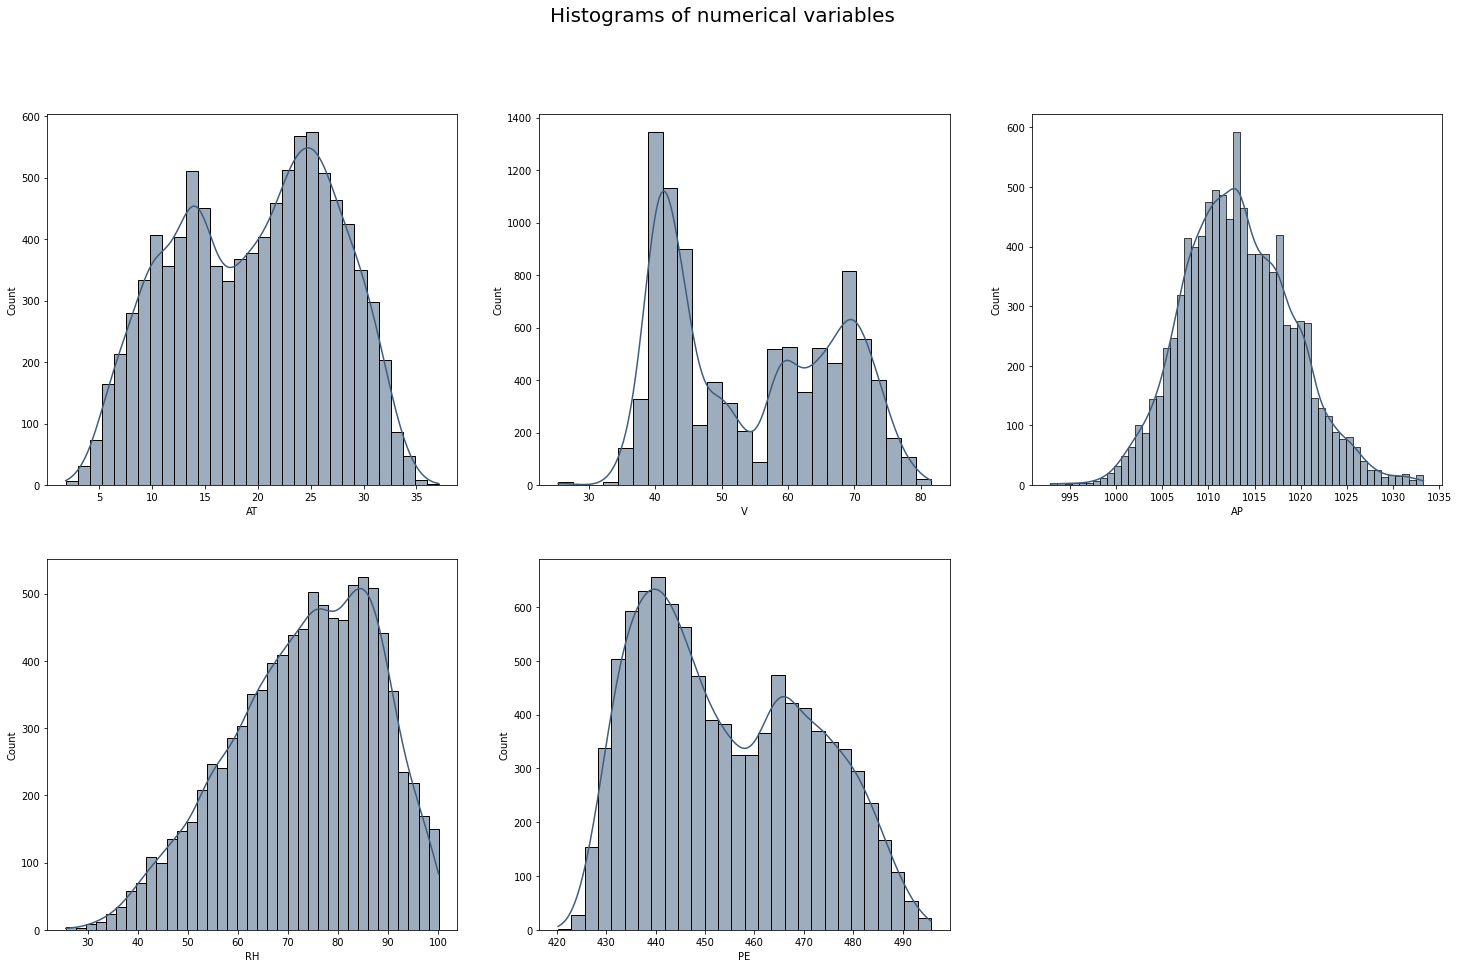

In [7]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(2, 3, i)
    f = plt.gca()
    sns.histplot(dataset.iloc[:, i-1], color = '#3F5D7D', kde= True)

## Pair Plot of numerical variables

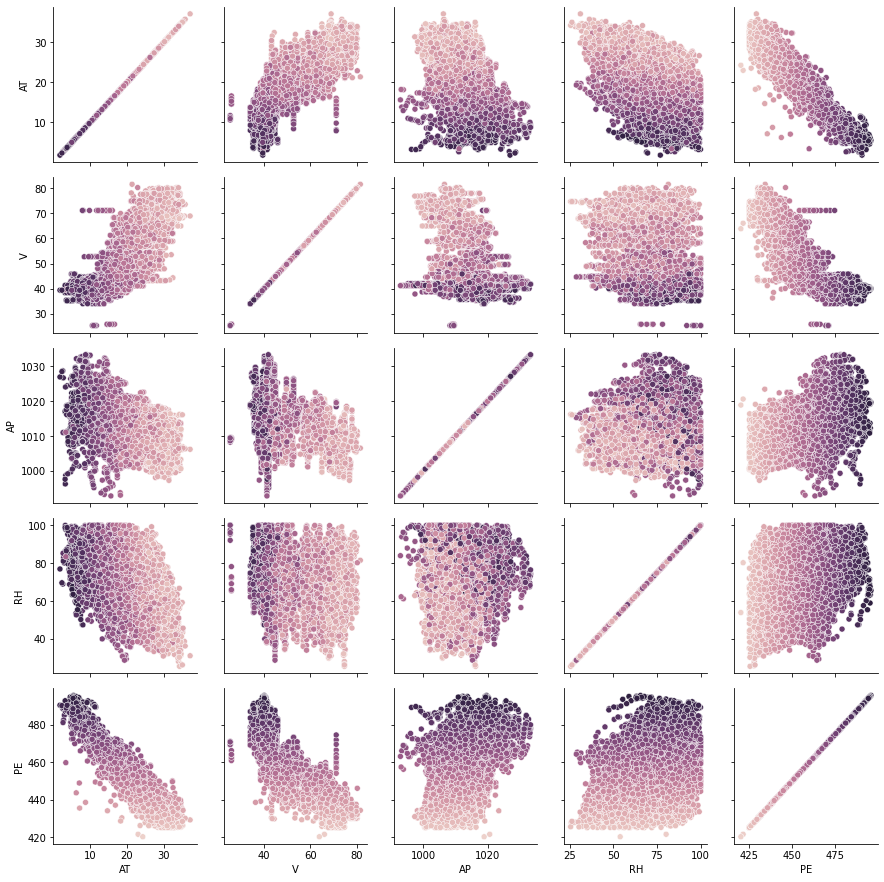

In [8]:
g = sns.PairGrid(data=dataset, vars=['AT', 'V', 'AP', 'RH','PE'], hue='PE')
g.map(sns.scatterplot,  color = '#3F5D7D')

## Scatter plot between the target variable and features

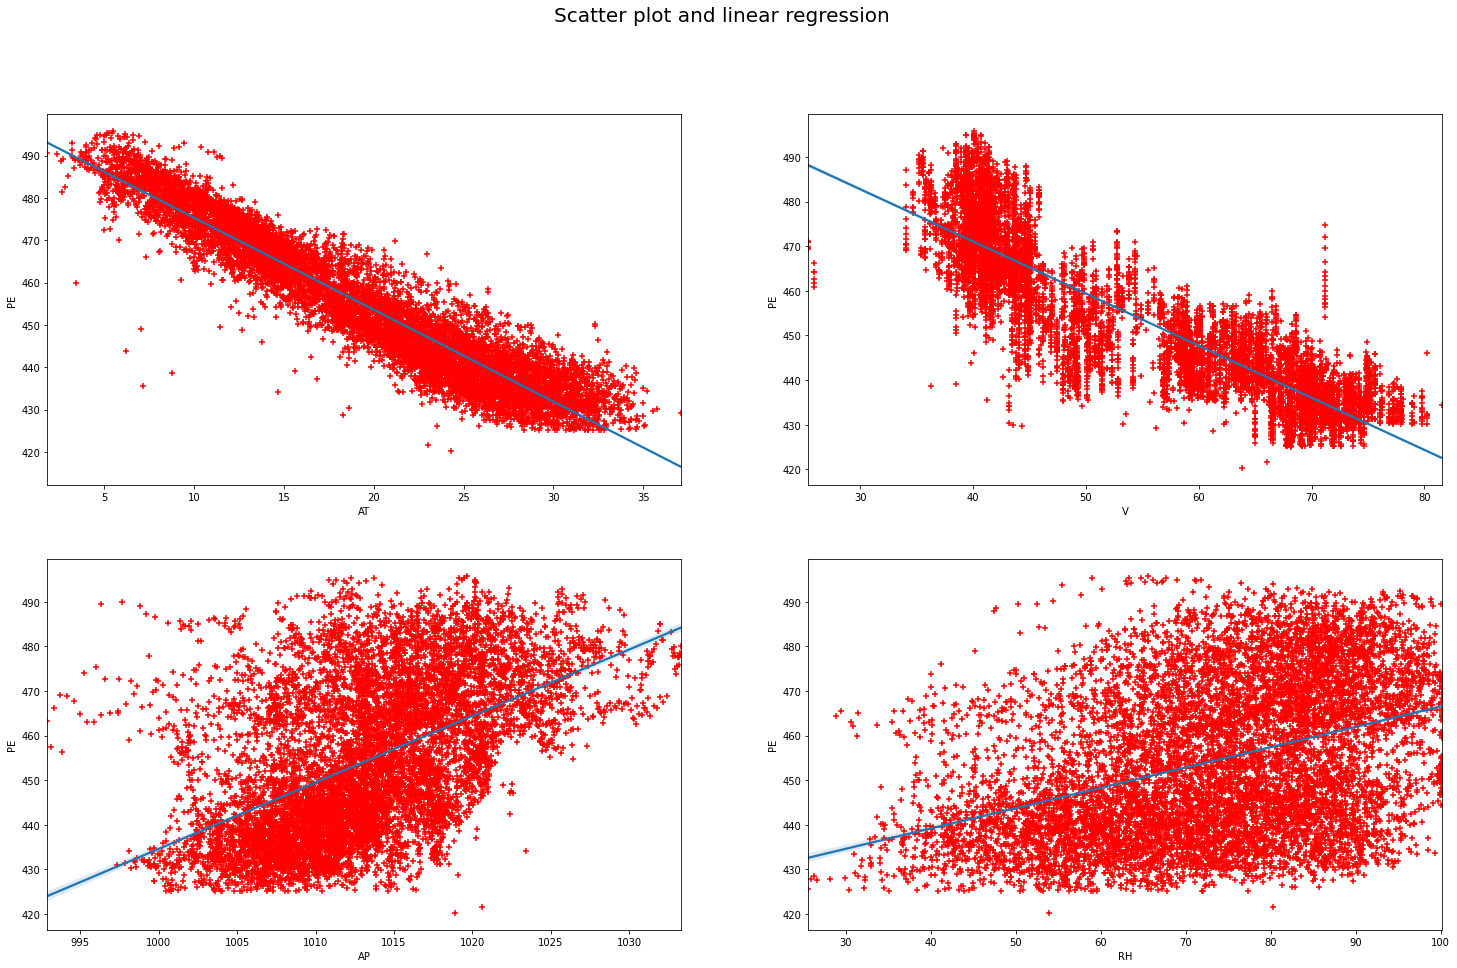

In [9]:
plt.figure(figsize=(25,15))
plt.suptitle('Scatter plot and linear regression', fontsize = 20)
for i in range(1, dataset.shape[1]):
    plt.subplot(2, 2, i)
    #f = plt.gca()
    sns.regplot(data=dataset, x=dataset.iloc[:, i-1], y=dataset['PE'], scatter=False, fit_reg=True)
    plt.scatter(dataset.iloc[:, i-1], dataset['PE'], color = 'r', marker='+' )
plt.show()

## Correlation with the response

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

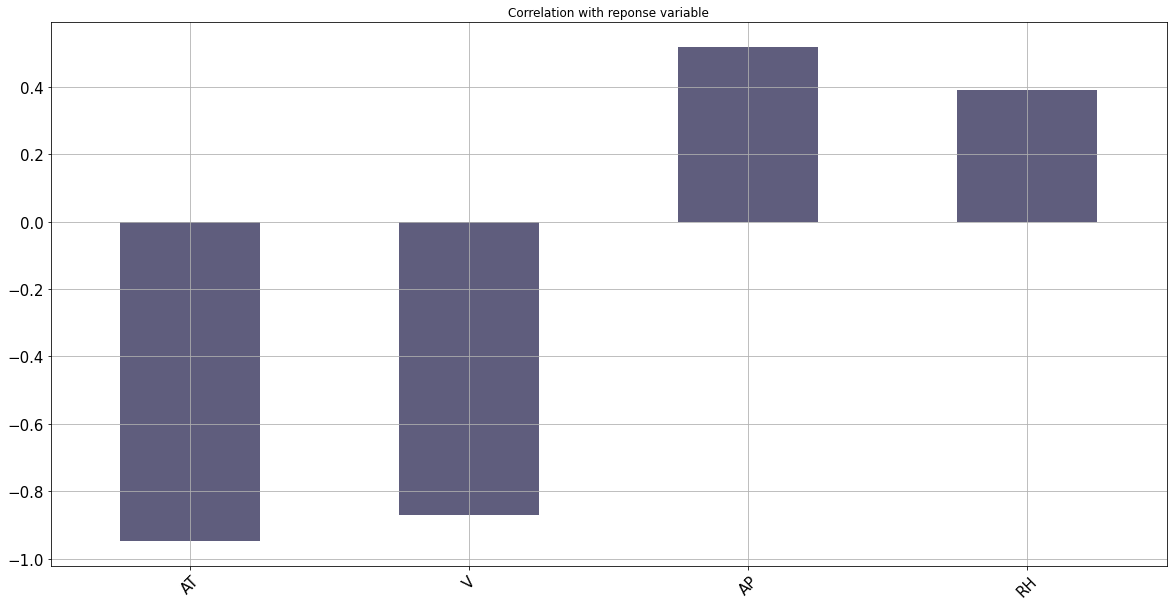

In [10]:
dataset.drop(columns='PE').corrwith(dataset.PE).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

## Matrix correlation between all variables

<AxesSubplot:>

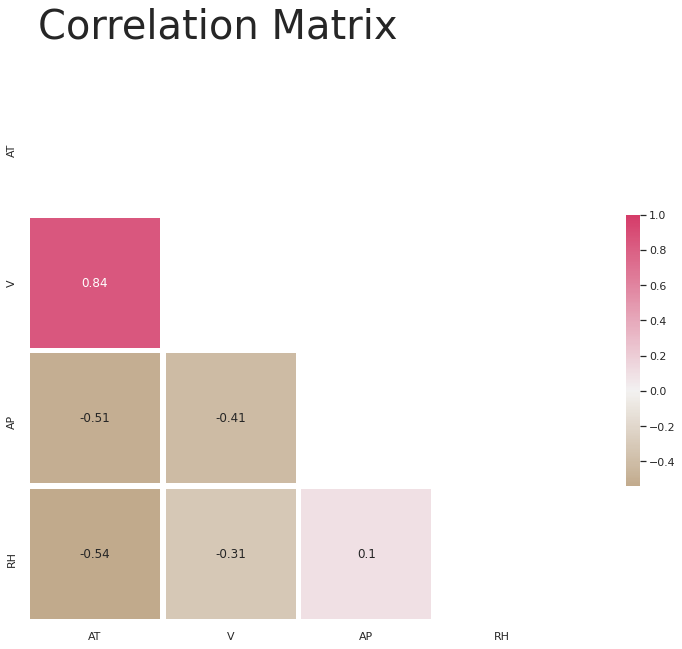

In [11]:
sns.set(style='white', font_scale= 1)
corr = dataset.drop(columns='PE').corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (20,10))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(50, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})

# Building the models with exhaustive analysis


## Subsets with one independent variable

### AT vs PE

In [12]:
X_11 = dataset.iloc[:, 0].values
y_11 = dataset.iloc[:, -1].values
X_11 = X_11.reshape(len(X_11), 1)

#### Splitting the dataset into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_11_train, X_11_test, y_11_train, y_11_test = train_test_split(X_11, y_11,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [14]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X11_LR = LinearRegression()
regressor_X11_LR.fit(X_11_train, y_11_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X11_DT = DecisionTreeRegressor(random_state = 0)
regressor_X11_DT.fit(X_11_train, y_11_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X11_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X11_RF.fit(X_11_train, y_11_train)

# Support Vector Machine
y_11_train = y_11_train.reshape(len(y_11_train), 1)
y_11_test = y_11_test.reshape(len(y_11_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X11 = StandardScaler()
sc_y11 = StandardScaler()
X_11_train_s = sc_X11.fit_transform(X_11_train)
y_11_train_s = sc_y11.fit_transform(y_11_train)

from sklearn.svm import SVR
regressor_X11_SV = SVR(kernel = 'rbf')
y_11_train_s = np.ravel(y_11_train_s)
regressor_X11_SV.fit(X_11_train_s, y_11_train_s)

SVR()

#### Predicting new results

In [15]:
y_pred_11_LR = regressor_X11_LR.predict(X_11_test) # Linear Regression
y_pred_11_DT = regressor_X11_DT.predict(X_11_test) # Decision Tree
y_pred_11_RF = regressor_X11_RF.predict(X_11_test) # Random Forest
y_pred_11_SV = sc_y11.inverse_transform(regressor_X11_SV.predict(sc_X11.transform(X_11_test))) # Support Vector Machine

#### Metrics scores

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_11_LR = mean_absolute_error(y_11_test, y_pred_11_LR)
print('MAE score: {:.3f}'.format(mae_11_LR))
rmse_11_LR = mean_squared_error(y_11_test, y_pred_11_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_11_LR))
r2_11_LR = r2_score(y_11_test, y_pred_11_LR)
print('R2 score: {:.3f}%'.format(r2_11_LR*100))
print('\n')

print('Decision Tree')
mae_11_DT = mean_absolute_error(y_11_test, y_pred_11_DT)
print('MAE score: {:.3f}'.format(mae_11_LR))
rmse_11_DT = mean_squared_error(y_11_test, y_pred_11_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_11_DT))
r2_11_DT = r2_score(y_11_test, y_pred_11_DT)
print('R2 score: {:.3f}%'.format(r2_11_DT*100))
print('\n')

print('Random Forest')
mae_11_RF = mean_absolute_error(y_11_test, y_pred_11_RF)
print('MAE score: {:.3f}'.format(mae_11_RF))
rmse_11_RF = mean_squared_error(y_11_test, y_pred_11_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_11_RF))
r2_11_RF = r2_score(y_11_test, y_pred_11_RF)
print('R2 score: {:.3f}%'.format(r2_11_RF*100))
print('\n')

print('Support Vector Machine')
mae_11_SV = mean_absolute_error(y_11_test, y_pred_11_SV)
print('MAE score: {:.3f}'.format(mae_11_SV))
rmse_11_SV = mean_squared_error(y_11_test, y_pred_11_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_11_SV))
r2_11_SV = r2_score(y_11_test, y_pred_11_SV)
print('R2 score: {:.3f}%'.format(r2_11_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 4.174
RMSE score: 5.273
R2 score: 90.495%


Decision Tree
MAE score: 4.174
RMSE score: 5.937
R2 score: 87.951%


Random Forest
MAE score: 4.495
RMSE score: 5.273
R2 score: 88.625%


Support Vector Machine
MAE score: 3.895
RMSE score: 4.966
R2 score: 91.569%




#### Cross Validation

In [17]:
#from sklearn.metrics import SCORERS as SC # If you want to know all the metrics
#SC.keys()

from sklearn.model_selection import cross_validate

y_11_train = np.ravel(y_11_train)

r211_LR = cross_validate(estimator=regressor_X11_LR, X = X_11_train, y=y_11_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r211_DT = cross_validate(estimator=regressor_X11_DT, X = X_11_train, y=y_11_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r211_RF = cross_validate(estimator=regressor_X11_RF, X = X_11_train, y=y_11_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r211_SV = cross_validate(estimator=regressor_X11_SV, X = sc_X11.inverse_transform(X_11_train_s), y=sc_y11.inverse_transform(y_11_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r211_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r211_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r211_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r211_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r211_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r211_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r211_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r211_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r211_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r211_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r211_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r211_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r211_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 4.318
Standard Deviation (+/-): 0.167
RMSE: 5.463
Standard Deviation (+/-): 0.237
R^2 score: 89.703 %
Standard Deviation (+/-): 0.013


Decision Tree
MAE: 4.811
Standard Deviation (+/-): 0.205
RMSE: 6.210
Standard Deviation (+/-): 0.437
R^2 score: 86.704 %
Standard Deviation (+/-): 0.016


Random Forest
MAE: 4.596
Standard Deviation (+/-): 0.213
RMSE: 5.900
Standard Deviation (+/-): 0.351
R^2 score: 87.994 %
Standard Deviation (+/-): 0.015


Support Vector Machine
MAE: 3.980
Standard Deviation (+/-): 0.140
RMSE: 5.112
Standard Deviation (+/-): 0.311
R^2 score: 90.981 %
Standard Deviation (+/-): 0.014




In [18]:
r211_LR 

{'fit_time': array([0.00083542, 0.0007019 , 0.00058842, 0.00061393, 0.00058079,
        0.00055599, 0.00055695, 0.00055766, 0.00060368, 0.00062442]),
 'score_time': array([0.00105667, 0.00071383, 0.00076914, 0.00070119, 0.00070548,
        0.00069213, 0.00069189, 0.00073552, 0.00073123, 0.00070262]),
 'test_neg_mean_absolute_error': array([-4.37006129, -4.20329046, -4.33250631, -4.46022496, -4.31191831,
        -4.20260452, -4.35054388, -4.39311609, -4.3485665 , -4.20784785]),
 'test_neg_root_mean_squared_error': array([-5.4912274 , -5.30441313, -5.33936291, -5.70025894, -5.36265236,
        -5.53811584, -5.4667557 , -5.49161705, -5.58415817, -5.3526436 ]),
 'test_r2': array([0.90036934, 0.9015964 , 0.90774088, 0.89442084, 0.89768925,
        0.89751614, 0.88866842, 0.89715473, 0.88444647, 0.90069334])}

In [19]:
from sklearn.metrics import SCORERS as SC # If you want to know all the metrics
SC.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### V vs PE

In [20]:
X_12 = dataset['V'].values
y_12 = dataset['PE'].values
X_12 = X_12.reshape(len(X_12), 1)

#### Splitting the dataset into training and test set

In [21]:
from sklearn.model_selection import train_test_split
X_12_train, X_12_test, y_12_train, y_12_test = train_test_split(X_12, y_12,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [22]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X12_LR = LinearRegression()
regressor_X12_LR.fit(X_12_train, y_12_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X12_DT = DecisionTreeRegressor(random_state = 0)
regressor_X12_DT.fit(X_12_train, y_12_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X12_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X12_RF.fit(X_12_train, y_12_train)

# Support Vector Machine
y_12_train = y_12_train.reshape(len(y_12_train), 1)
y_12_test = y_12_test.reshape(len(y_12_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X12 = StandardScaler()
sc_y12 = StandardScaler()
X_12_train_s = sc_X12.fit_transform(X_12_train)
y_12_train_s = sc_y12.fit_transform(y_12_train)

from sklearn.svm import SVR
regressor_X12_SV = SVR(kernel = 'rbf')
y_12_train_s = np.ravel(y_12_train_s)
regressor_X12_SV.fit(X_12_train_s, y_12_train_s)

SVR()

#### Predicting new results

In [23]:
y_pred_12_LR = regressor_X12_LR.predict(X_12_test) # Linear Regression
y_pred_12_DT = regressor_X12_DT.predict(X_12_test) # Decision Tree
y_pred_12_RF = regressor_X12_RF.predict(X_12_test) # Random Forest
y_pred_12_SV = sc_y12.inverse_transform(regressor_X12_SV.predict(sc_X12.transform(X_12_test))) # Support Vector Machine

#### Metrics scores

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_12_LR = mean_absolute_error(y_12_test, y_pred_12_LR)
print('MAE score: {:.3f}'.format(mae_12_LR))
rmse_12_LR = mean_squared_error(y_12_test, y_pred_12_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_12_LR))
r2_12_LR = r2_score(y_12_test, y_pred_12_LR)
print('R2 score: {:.3f}%'.format(r2_12_LR*100))
print('\n')

print('Decision Tree')
mae_12_DT = mean_absolute_error(y_12_test, y_pred_12_DT)
print('MAE score: {:.3f}'.format(mae_12_LR))
rmse_12_DT = mean_squared_error(y_12_test, y_pred_12_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_12_DT))
r2_12_DT = r2_score(y_12_test, y_pred_12_DT)
print('R2 score: {:.3f}%'.format(r2_12_DT*100))
print('\n')

print('Random Forest')
mae_12_RF = mean_absolute_error(y_12_test, y_pred_12_RF)
print('MAE score: {:.3f}'.format(mae_12_RF))
rmse_12_RF = mean_squared_error(y_12_test, y_pred_12_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_12_RF))
r2_12_RF = r2_score(y_12_test, y_pred_12_RF)
print('R2 score: {:.3f}%'.format(r2_12_RF*100))
print('\n')

print('Support Vector Machine')
mae_12_SV = mean_absolute_error(y_12_test, y_pred_12_SV)
print('MAE score: {:.3f}'.format(mae_12_SV))
rmse_12_SV = mean_squared_error(y_12_test, y_pred_12_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_12_SV))
r2_12_SV = r2_score(y_12_test, y_pred_12_SV)
print('R2 score: {:.3f}%'.format(r2_12_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 6.571
RMSE score: 8.451
R2 score: 75.582%


Decision Tree
MAE score: 6.571
RMSE score: 5.131
R2 score: 90.998%


Random Forest
MAE score: 3.880
RMSE score: 8.451
R2 score: 90.846%


Support Vector Machine
MAE score: 5.967
RMSE score: 7.673
R2 score: 79.870%




#### Cross Validation

In [25]:
from sklearn.model_selection import cross_validate

y_12_train = np.ravel(y_12_train)

r212_LR = cross_validate(estimator=regressor_X12_LR, X = X_12_train, y=y_12_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r212_DT = cross_validate(estimator=regressor_X12_DT, X = X_12_train, y=y_12_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r212_RF = cross_validate(estimator=regressor_X12_RF, X = X_12_train, y=y_12_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r212_SV = cross_validate(estimator=regressor_X12_SV, X = sc_X12.inverse_transform(X_12_train_s), y=sc_y12.inverse_transform(y_12_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r212_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r212_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r212_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r212_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r212_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r212_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r212_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r212_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r212_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r212_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r212_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r212_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r212_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 6.581
Standard Deviation (+/-): 0.363
RMSE: 8.412
Standard Deviation (+/-): 0.534
R^2 score: 75.618 %
Standard Deviation (+/-): 0.023


Decision Tree
MAE: 3.777
Standard Deviation (+/-): 0.261
RMSE: 5.155
Standard Deviation (+/-): 0.418
R^2 score: 90.822 %
Standard Deviation (+/-): 0.017


Random Forest
MAE: 3.802
Standard Deviation (+/-): 0.258
RMSE: 5.194
Standard Deviation (+/-): 0.426
R^2 score: 90.683 %
Standard Deviation (+/-): 0.017


Support Vector Machine
MAE: 6.082
Standard Deviation (+/-): 0.358
RMSE: 7.772
Standard Deviation (+/-): 0.500
R^2 score: 79.169 %
Standard Deviation (+/-): 0.026




### AP vs PE

In [26]:
X_13 = dataset['AP'].values
y_13 = dataset['PE'].values
X_13 = X_13.reshape(len(X_13), 1)

#### Splitting the dataset into training and test set

In [27]:
from sklearn.model_selection import train_test_split
X_13_train, X_13_test, y_13_train, y_13_test = train_test_split(X_13, y_13,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [28]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X13_LR = LinearRegression()
regressor_X13_LR.fit(X_13_train, y_13_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X13_DT = DecisionTreeRegressor(random_state = 0)
regressor_X13_DT.fit(X_13_train, y_13_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X13_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X13_RF.fit(X_13_train, y_13_train)

# Support Vector Machine
y_13_train = y_13_train.reshape(len(y_13_train), 1)
y_13_test = y_13_test.reshape(len(y_13_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X13 = StandardScaler()
sc_y13 = StandardScaler()
X_13_train_s = sc_X13.fit_transform(X_13_train)
y_13_train_s = sc_y13.fit_transform(y_13_train)

from sklearn.svm import SVR
regressor_X13_SV = SVR(kernel = 'rbf')
y_13_train_s = np.ravel(y_13_train_s)
regressor_X13_SV.fit(X_13_train_s, y_13_train_s)

SVR()

#### Predicting new results

In [29]:
y_pred_13_LR = regressor_X13_LR.predict(X_13_test) # Linear Regression
y_pred_13_DT = regressor_X13_DT.predict(X_13_test) # Decision Tree
y_pred_13_RF = regressor_X13_RF.predict(X_13_test) # Random Forest
y_pred_13_SV = sc_y13.inverse_transform(regressor_X13_SV.predict(sc_X13.transform(X_13_test))) # Support Vector Machine

#### Metrics scores

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_13_LR = mean_absolute_error(y_13_test, y_pred_13_LR)
print('MAE score: {:.3f}'.format(mae_13_LR))
rmse_13_LR = mean_squared_error(y_13_test, y_pred_13_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_13_LR))
r2_13_LR = r2_score(y_13_test, y_pred_13_LR)
print('R2 score: {:.3f}%'.format(r2_13_LR*100))
print('\n')

print('Decision Tree')
mae_13_DT = mean_absolute_error(y_13_test, y_pred_13_DT)
print('MAE score: {:.3f}'.format(mae_13_LR))
rmse_13_DT = mean_squared_error(y_13_test, y_pred_13_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_13_DT))
r2_13_DT = r2_score(y_13_test, y_pred_13_DT)
print('R2 score: {:.3f}%'.format(r2_13_DT*100))
print('\n')

print('Random Forest')
mae_13_RF = mean_absolute_error(y_13_test, y_pred_13_RF)
print('MAE score: {:.3f}'.format(mae_13_RF))
rmse_13_RF = mean_squared_error(y_13_test, y_pred_13_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_13_RF))
r2_13_RF = r2_score(y_13_test, y_pred_13_RF)
print('R2 score: {:.3f}%'.format(r2_13_RF*100))
print('\n')

print('Support Vector Machine')
mae_13_SV = mean_absolute_error(y_13_test, y_pred_13_SV)
print('MAE score: {:.3f}'.format(mae_13_SV))
rmse_13_SV = mean_squared_error(y_13_test, y_pred_13_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_13_SV))
r2_13_SV = r2_score(y_13_test, y_pred_13_SV)
print('R2 score: {:.3f}%'.format(r2_13_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 12.052
RMSE score: 14.689
R2 score: 26.233%


Decision Tree
MAE score: 12.052
RMSE score: 16.781
R2 score: 3.723%


Random Forest
MAE score: 12.866
RMSE score: 14.689
R2 score: 9.067%


Support Vector Machine
MAE score: 11.329
RMSE score: 14.706
R2 score: 26.064%




#### Cross Validation

In [31]:
from sklearn.model_selection import cross_validate

y_13_train = np.ravel(y_13_train)

r213_LR = cross_validate(estimator=regressor_X13_LR, X = X_13_train, y=y_13_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r213_DT = cross_validate(estimator=regressor_X13_DT, X = X_13_train, y=y_13_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r213_RF = cross_validate(estimator=regressor_X13_RF, X = X_13_train, y=y_13_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r213_SV = cross_validate(estimator=regressor_X13_SV, X = sc_X13.inverse_transform(X_13_train_s), y=sc_y13.inverse_transform(y_13_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r213_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r213_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r213_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r213_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r213_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r213_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r213_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r213_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r213_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r213_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r213_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r213_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r213_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 11.929
Standard Deviation (+/-): 0.738
RMSE: 14.567
Standard Deviation (+/-): 0.882
R^2 score: 26.930 %
Standard Deviation (+/-): 0.043


Decision Tree
MAE: 13.094
Standard Deviation (+/-): 1.044
RMSE: 16.717
Standard Deviation (+/-): 1.160
R^2 score: 3.676 %
Standard Deviation (+/-): 0.112


Random Forest
MAE: 12.779
Standard Deviation (+/-): 0.916
RMSE: 16.237
Standard Deviation (+/-): 0.983
R^2 score: 9.123 %
Standard Deviation (+/-): 0.096


Support Vector Machine
MAE: 11.283
Standard Deviation (+/-): 0.643
RMSE: 14.618
Standard Deviation (+/-): 0.764
R^2 score: 26.390 %
Standard Deviation (+/-): 0.047




### RH vs PE

In [32]:
X_14 = dataset['RH'].values
y_14 = dataset['PE'].values
X_14 = X_14.reshape(len(X_14), 1) 

#### Splitting the dataset into training and test set

In [33]:
from sklearn.model_selection import train_test_split
X_14_train, X_14_test, y_14_train, y_14_test = train_test_split(X_14, y_14,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [34]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X14_LR = LinearRegression()
regressor_X14_LR.fit(X_14_train, y_14_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X14_DT = DecisionTreeRegressor(random_state = 0)
regressor_X14_DT.fit(X_14_train, y_14_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X14_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X14_RF.fit(X_14_train, y_14_train)

# Support Vector Machine
y_14_train = y_14_train.reshape(len(y_14_train), 1)
y_14_test = y_14_test.reshape(len(y_14_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X14 = StandardScaler()
sc_y14 = StandardScaler()
X_14_train_s = sc_X14.fit_transform(X_14_train)
#X_11_test_s = sc_X11.fit(X_11_test)
y_14_train_s = sc_y14.fit_transform(y_14_train)
#y_11_test_s = sc_X11.fit(y_11_test)

from sklearn.svm import SVR
regressor_X14_SV = SVR(kernel = 'rbf')
y_14_train_s = np.ravel(y_14_train_s)
regressor_X14_SV.fit(X_14_train_s, y_14_train_s)

SVR()

#### Predicting new results

In [35]:
y_pred_14_LR = regressor_X14_LR.predict(X_14_test) # Linear Regression
y_pred_14_DT = regressor_X14_DT.predict(X_14_test) # Decision Tree
y_pred_14_RF = regressor_X14_RF.predict(X_14_test) # Random Forest
y_pred_14_SV = sc_y14.inverse_transform(regressor_X14_SV.predict(sc_X14.transform(X_14_test))) # Support Vector Machine

#### Metrics scores

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_14_LR = mean_absolute_error(y_14_test, y_pred_14_LR)
print('MAE score: {:.3f}'.format(mae_14_LR))
rmse_14_LR = mean_squared_error(y_14_test, y_pred_14_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_14_LR))
r2_14_LR = r2_score(y_14_test, y_pred_14_LR)
print('R2 score: {:.3f}%'.format(r2_14_LR*100))
print('\n')

print('Decision Tree')
mae_14_DT = mean_absolute_error(y_14_test, y_pred_14_DT)
print('MAE score: {:.3f}'.format(mae_14_LR))
rmse_14_DT = mean_squared_error(y_14_test, y_pred_14_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_14_DT))
r2_14_DT = r2_score(y_14_test, y_pred_14_DT)
print('R2 score: {:.3f}%'.format(r2_14_DT*100))
print('\n')

print('Random Forest')
mae_14_RF = mean_absolute_error(y_14_test, y_pred_14_RF)
print('MAE score: {:.3f}'.format(mae_14_RF))
rmse_14_RF = mean_squared_error(y_14_test, y_pred_14_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_14_RF))
r2_14_RF = r2_score(y_14_test, y_pred_14_RF)
print('R2 score: {:.3f}%'.format(r2_14_RF*100))
print('\n')

print('Support Vector Machine')
mae_14_SV = mean_absolute_error(y_14_test, y_pred_14_SV)
print('MAE score: {:.3f}'.format(mae_14_SV))
rmse_14_SV = mean_squared_error(y_14_test, y_pred_14_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_14_SV))
r2_14_SV = r2_score(y_14_test, y_pred_14_SV)
print('R2 score: {:.3f}%'.format(r2_14_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 13.198
RMSE score: 15.697
R2 score: 15.763%


Decision Tree
MAE score: 13.198
RMSE score: 20.158
R2 score: -38.929%


Random Forest
MAE score: 15.022
RMSE score: 15.697
R2 score: -19.357%


Support Vector Machine
MAE score: 12.888
RMSE score: 15.797
R2 score: 14.678%




#### Cross Validation

In [37]:
from sklearn.model_selection import cross_validate

y_14_train = np.ravel(y_14_train)

r214_LR = cross_validate(estimator=regressor_X14_LR, X = X_14_train, y=y_14_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r214_DT = cross_validate(estimator=regressor_X14_DT, X = X_14_train, y=y_14_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r214_RF = cross_validate(estimator=regressor_X14_RF, X = X_14_train, y=y_14_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r214_SV = cross_validate(estimator=regressor_X14_SV, X = sc_X14.inverse_transform(X_14_train_s), y=sc_y14.inverse_transform(y_14_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r214_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r214_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r214_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r214_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r214_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r214_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r214_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r214_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r214_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r214_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r214_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r214_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r214_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 13.197
Standard Deviation (+/-): 0.915
RMSE: 15.719
Standard Deviation (+/-): 0.829
R^2 score: 14.911 %
Standard Deviation (+/-): 0.033


Decision Tree
MAE: 16.098
Standard Deviation (+/-): 0.851
RMSE: 20.226
Standard Deviation (+/-): 0.826
R^2 score: 40.945 %
Standard Deviation (+/-): 0.084


Random Forest
MAE: 14.967
Standard Deviation (+/-): 0.726
RMSE: 18.648
Standard Deviation (+/-): 0.796
R^2 score: 19.805 %
Standard Deviation (+/-): 0.068


Support Vector Machine
MAE: 13.019
Standard Deviation (+/-): 1.000
RMSE: 15.883
Standard Deviation (+/-): 0.874
R^2 score: 13.111 %
Standard Deviation (+/-): 0.051




## Subsets with two independent variables

### AP-V vs PE

In [38]:
X_21 = dataset.iloc[:, 1:3].values
y_21 = dataset['PE'].values

#### Splitting the dataset into training and test set


In [39]:
from sklearn.model_selection import train_test_split
X_21_train, X_21_test, y_21_train, y_21_test = train_test_split(X_21, y_21,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [40]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X21_LR = LinearRegression()
regressor_X21_LR.fit(X_21_train, y_21_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X21_DT = DecisionTreeRegressor(random_state = 0)
regressor_X21_DT.fit(X_21_train, y_21_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X21_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X21_RF.fit(X_21_train, y_21_train)

# Support Vector Machine

y_21_train = y_21_train.reshape(len(y_11_train), 1)
y_21_test = y_21_test.reshape(len(y_21_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X21 = StandardScaler()
sc_y21 = StandardScaler()
X_21_train_s = sc_X21.fit_transform(X_21_train)
y_21_train_s = sc_y21.fit_transform(y_21_train)

from sklearn.svm import SVR
regressor_X21_SV = SVR(kernel = 'rbf')
y_21_train_s = np.ravel(y_21_train_s)
regressor_X21_SV.fit(X_21_train_s, y_21_train_s)

SVR()

#### Predicting new results

In [41]:
y_pred_21_LR = regressor_X21_LR.predict(X_21_test) # Linear Regression
y_pred_21_DT = regressor_X21_DT.predict(X_21_test) # Decision Tree
y_pred_21_RF = regressor_X21_RF.predict(X_21_test) # Random Forest
y_pred_21_SV = sc_y21.inverse_transform(regressor_X21_SV.predict(sc_X21.transform(X_21_test))) # Support Vector Machine

#### Metrics Scores

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_21_LR = mean_absolute_error(y_21_test, y_pred_21_LR)
print('MAE score: {:.3f}'.format(mae_21_LR))
rmse_21_LR = mean_squared_error(y_21_test, y_pred_21_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_21_LR))
r2_21_LR = r2_score(y_21_test, y_pred_21_LR)
print('R2 score: {:.3f}%'.format(r2_21_LR*100))
print('\n')

print('Decision Tree')
mae_21_DT = mean_absolute_error(y_21_test, y_pred_21_DT)
print('MAE score: {:.3f}'.format(mae_21_LR))
rmse_21_DT = mean_squared_error(y_21_test, y_pred_21_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_21_DT))
r2_21_DT = r2_score(y_21_test, y_pred_21_DT)
print('R2 score: {:.3f}%'.format(r2_21_DT*100))
print('\n')

print('Random Forest')
mae_21_RF = mean_absolute_error(y_21_test, y_pred_21_RF)
print('MAE score: {:.3f}'.format(mae_21_RF))
rmse_21_RF = mean_squared_error(y_21_test, y_pred_21_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_21_RF))
r2_21_RF = r2_score(y_21_test, y_pred_21_RF)
print('R2 score: {:.3f}%'.format(r2_21_RF*100))
print('\n')

print('Support Vector Machine')
mae_21_SV = mean_absolute_error(y_21_test, y_pred_21_SV)
print('MAE score: {:.3f}'.format(mae_21_SV))
rmse_21_SV = mean_squared_error(y_21_test, y_pred_21_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_21_SV))
r2_21_SV = r2_score(y_21_test, y_pred_21_SV)
print('R2 score: {:.3f}%'.format(r2_21_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 6.140
RMSE score: 7.907
R2 score: 78.624%


Decision Tree
MAE score: 6.140
RMSE score: 5.973
R2 score: 87.801%


Random Forest
MAE score: 3.262
RMSE score: 7.907
R2 score: 92.246%


Support Vector Machine
MAE score: 5.421
RMSE score: 7.088
R2 score: 82.822%




#### Cross Validation

In [43]:
from sklearn.model_selection import cross_validate

y_21_train = np.ravel(y_21_train)

r221_LR = cross_validate(estimator=regressor_X21_LR, X = X_21_train, y=y_21_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r221_DT = cross_validate(estimator=regressor_X21_DT, X = X_21_train, y=y_21_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r221_RF = cross_validate(estimator=regressor_X21_RF, X = X_21_train, y=y_21_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r221_SV = cross_validate(estimator=regressor_X21_SV, X = sc_X21.inverse_transform(X_21_train_s), y=sc_y21.inverse_transform(y_21_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r221_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r221_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r221_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r221_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r221_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r221_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r221_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r221_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r221_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r221_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r221_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r221_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r221_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 6.159
Standard Deviation (+/-): 0.378
RMSE: 7.870
Standard Deviation (+/-): 0.562
R^2 score: 78.671 %
Standard Deviation (+/-): 0.017


Decision Tree
MAE: 3.624
Standard Deviation (+/-): 0.320
RMSE: 5.589
Standard Deviation (+/-): 0.699
R^2 score: 89.224 %
Standard Deviation (+/-): 0.022


Random Forest
MAE: 3.288
Standard Deviation (+/-): 0.216
RMSE: 4.741
Standard Deviation (+/-): 0.449
R^2 score: 92.254 %
Standard Deviation (+/-): 0.011


Support Vector Machine
MAE: 11.500
Standard Deviation (+/-): 0.759
RMSE: 13.871
Standard Deviation (+/-): 0.888
R^2 score: 33.762 %
Standard Deviation (+/-): 0.025




### AT-AP vs PE

In [44]:
X_22 = dataset.iloc[:, 0:3:2].values
y_22 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [45]:
from sklearn.model_selection import train_test_split
X_22_train, X_22_test, y_22_train, y_22_test = train_test_split(X_22, y_22,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [46]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X22_LR = LinearRegression()
regressor_X22_LR.fit(X_22_train, y_22_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X22_DT = DecisionTreeRegressor(random_state = 0)
regressor_X22_DT.fit(X_22_train, y_22_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X22_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X22_RF.fit(X_22_train, y_22_train)

# Support Vector Machine

y_22_train = y_22_train.reshape(len(y_22_train), 1)
y_22_test = y_22_test.reshape(len(y_22_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X22 = StandardScaler()
sc_y22 = StandardScaler()
X_22_train_s = sc_X22.fit_transform(X_22_train)
y_22_train_s = sc_y22.fit_transform(y_22_train)

from sklearn.svm import SVR
regressor_X22_SV = SVR(kernel = 'rbf')
y_22_train_s = np.ravel(y_22_train_s)
regressor_X22_SV.fit(X_22_train_s, y_22_train_s)

SVR()

#### Predicting new results

In [47]:
y_pred_22_LR = regressor_X22_LR.predict(X_22_test) # Linear Regression
y_pred_22_DT = regressor_X22_DT.predict(X_22_test) # Decision Tree
y_pred_22_RF = regressor_X22_RF.predict(X_22_test) # Random Forest
y_pred_22_SV = sc_y22.inverse_transform(regressor_X22_SV.predict(sc_X22.transform(X_22_test))) # Support Vector Machine

#### Metrics Scores

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_22_LR = mean_absolute_error(y_22_test, y_pred_22_LR)
print('MAE score: {:.3f}'.format(mae_22_LR))
rmse_22_LR = mean_squared_error(y_22_test, y_pred_22_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_22_LR))
r2_22_LR = r2_score(y_22_test, y_pred_22_LR)
print('R2 score: {:.3f}%'.format(r2_22_LR*100))
print('\n')

print('Decision Tree')
mae_22_DT = mean_absolute_error(y_22_test, y_pred_22_DT)
print('MAE score: {:.3f}'.format(mae_22_LR))
rmse_22_DT = mean_squared_error(y_22_test, y_pred_22_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_22_DT))
r2_22_DT = r2_score(y_22_test, y_pred_22_DT)
print('R2 score: {:.3f}%'.format(r2_22_DT*100))
print('\n')

print('Random Forest')
mae_22_RF = mean_absolute_error(y_22_test, y_pred_22_RF)
print('MAE score: {:.3f}'.format(mae_22_RF))
rmse_22_RF = mean_squared_error(y_22_test, y_pred_22_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_22_RF))
r2_22_RF = r2_score(y_22_test, y_pred_22_RF)
print('R2 score: {:.3f}%'.format(r2_22_RF*100))
print('\n')

print('Support Vector Machine')
mae_22_SV = mean_absolute_error(y_22_test, y_pred_22_SV)
print('MAE score: {:.3f}'.format(mae_22_SV))
rmse_22_SV = mean_squared_error(y_22_test, y_pred_22_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_22_SV))
r2_22_SV = r2_score(y_22_test, y_pred_22_SV)
print('R2 score: {:.3f}%'.format(r2_22_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 4.179
RMSE score: 5.223
R2 score: 90.673%


Decision Tree
MAE score: 4.179
RMSE score: 6.735
R2 score: 84.493%


Random Forest
MAE score: 4.095
RMSE score: 5.223
R2 score: 90.418%


Support Vector Machine
MAE score: 3.717
RMSE score: 4.753
R2 score: 92.275%




#### Cross Validation

In [49]:
from sklearn.model_selection import cross_validate

y_22_train = np.ravel(y_22_train)

r222_LR = cross_validate(estimator=regressor_X22_LR, X = X_22_train, y=y_22_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r222_DT = cross_validate(estimator=regressor_X22_DT, X = X_22_train, y=y_22_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r222_RF = cross_validate(estimator=regressor_X22_RF, X = X_22_train, y=y_22_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r222_SV = cross_validate(estimator=regressor_X22_SV, X = sc_X22.inverse_transform(X_22_train_s), y=sc_y22.inverse_transform(y_22_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r222_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r222_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r222_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r222_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r222_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r222_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r222_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r222_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r222_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r222_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r222_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r222_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r222_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 4.305
Standard Deviation (+/-): 0.165
RMSE: 5.413
Standard Deviation (+/-): 0.228
R^2 score: 89.890 %
Standard Deviation (+/-): 0.012


Decision Tree
MAE: 5.074
Standard Deviation (+/-): 0.345
RMSE: 6.807
Standard Deviation (+/-): 0.455
R^2 score: 84.007 %
Standard Deviation (+/-): 0.025


Random Forest
MAE: 4.087
Standard Deviation (+/-): 0.218
RMSE: 5.363
Standard Deviation (+/-): 0.360
R^2 score: 90.072 %
Standard Deviation (+/-): 0.015


Support Vector Machine
MAE: 13.442
Standard Deviation (+/-): 0.776
RMSE: 15.853
Standard Deviation (+/-): 0.899
R^2 score: 13.476 %
Standard Deviation (+/-): 0.023




### AT-RH vs PE

In [50]:
X_23 = dataset.iloc[:, 0:4:3].values
y_23 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [51]:
from sklearn.model_selection import train_test_split
X_23_train, X_23_test, y_23_train, y_23_test = train_test_split(X_23, y_23,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [52]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X23_LR = LinearRegression()
regressor_X23_LR.fit(X_23_train, y_23_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X23_DT = DecisionTreeRegressor(random_state = 0)
regressor_X23_DT.fit(X_23_train, y_23_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X23_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X23_RF.fit(X_23_train, y_23_train)

# Support Vector Machine

y_23_train = y_23_train.reshape(len(y_23_train), 1)
y_23_test = y_23_test.reshape(len(y_23_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X23 = StandardScaler()
sc_y23 = StandardScaler()
X_23_train_s = sc_X23.fit_transform(X_23_train)
y_23_train_s = sc_y23.fit_transform(y_23_train)
from sklearn.svm import SVR
regressor_X23_SV = SVR(kernel = 'rbf')
y_23_train_s = np.ravel(y_23_train_s)
regressor_X23_SV.fit(X_23_train_s, y_23_train_s)

SVR()

#### Predicting new results

In [53]:
y_pred_23_LR = regressor_X23_LR.predict(X_23_test) # Linear Regression
y_pred_23_DT = regressor_X23_DT.predict(X_23_test) # Decision Tree
y_pred_23_RF = regressor_X23_RF.predict(X_23_test) # Random Forest
y_pred_23_SV = sc_y23.inverse_transform(regressor_X23_SV.predict(sc_X23.transform(X_23_test))) # Support Vector Machine

#### Metrics Scores

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_23_LR = mean_absolute_error(y_23_test, y_pred_23_LR)
print('MAE score: {:.3f}'.format(mae_23_LR))
rmse_23_LR = mean_squared_error(y_23_test, y_pred_23_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_23_LR))
r2_23_LR = r2_score(y_23_test, y_pred_23_LR)
print('R2 score: {:.3f}%'.format(r2_23_LR*100))
print('\n')

print('Decision Tree')
mae_23_DT = mean_absolute_error(y_23_test, y_pred_23_DT)
print('MAE score: {:.3f}'.format(mae_23_LR))
rmse_23_DT = mean_squared_error(y_23_test, y_pred_23_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_23_DT))
r2_23_DT = r2_score(y_23_test, y_pred_23_DT)
print('R2 score: {:.3f}%'.format(r2_23_DT*100))
print('\n')

print('Random Forest')
mae_23_RF = mean_absolute_error(y_23_test, y_pred_23_RF)
print('MAE score: {:.3f}'.format(mae_23_RF))
rmse_23_RF = mean_squared_error(y_23_test, y_pred_23_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_23_RF))
r2_23_RF = r2_score(y_23_test, y_pred_23_RF)
print('R2 score: {:.3f}%'.format(r2_23_RF*100))
print('\n')

print('Support Vector Machine')
mae_23_SV = mean_absolute_error(y_23_test, y_pred_23_SV)
print('MAE score: {:.3f}'.format(mae_23_SV))
rmse_23_SV = mean_squared_error(y_23_test, y_pred_23_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_23_SV))
r2_23_SV = r2_score(y_23_test, y_pred_23_SV)
print('R2 score: {:.3f}%'.format(r2_23_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 3.726
RMSE score: 4.664
R2 score: 92.562%


Decision Tree
MAE score: 3.726
RMSE score: 6.217
R2 score: 86.784%


Random Forest
MAE score: 3.785
RMSE score: 4.664
R2 score: 91.967%


Support Vector Machine
MAE score: 3.431
RMSE score: 4.385
R2 score: 93.426%




#### Cross Validation

In [55]:
from sklearn.model_selection import cross_validate

y_23_train = np.ravel(y_23_train)

r223_LR = cross_validate(estimator=regressor_X23_LR, X = X_23_train, y=y_23_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r223_DT = cross_validate(estimator=regressor_X23_DT, X = X_23_train, y=y_23_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r223_RF = cross_validate(estimator=regressor_X23_RF, X = X_23_train, y=y_23_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r223_SV = cross_validate(estimator=regressor_X23_SV, X = sc_X23.inverse_transform(X_23_train_s), y=sc_y23.inverse_transform(y_23_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r223_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r223_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r223_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r223_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r223_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r223_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r223_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r223_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r223_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r223_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r223_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r223_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r223_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 3.817
Standard Deviation (+/-): 0.119
RMSE: 4.831
Standard Deviation (+/-): 0.293
R^2 score: 91.949 %
Standard Deviation (+/-): 0.011


Decision Tree
MAE: 4.876
Standard Deviation (+/-): 0.289
RMSE: 6.352
Standard Deviation (+/-): 0.394
R^2 score: 86.082 %
Standard Deviation (+/-): 0.019


Random Forest
MAE: 3.866
Standard Deviation (+/-): 0.146
RMSE: 5.052
Standard Deviation (+/-): 0.353
R^2 score: 91.191 %
Standard Deviation (+/-): 0.013


Support Vector Machine
MAE: 3.625
Standard Deviation (+/-): 0.111
RMSE: 4.665
Standard Deviation (+/-): 0.299
R^2 score: 92.490 %
Standard Deviation (+/-): 0.011




### V-AP vs PE

In [56]:
X_24= dataset.iloc[:, 1:3].values
y_24 = dataset['PE'].values

### Splitting the dataset into training and test set

In [57]:
from sklearn.model_selection import train_test_split
X_24_train, X_24_test, y_24_train, y_24_test = train_test_split(X_24, y_24,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [58]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X24_LR = LinearRegression()
regressor_X24_LR.fit(X_24_train, y_24_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X24_DT = DecisionTreeRegressor(random_state = 0)
regressor_X24_DT.fit(X_24_train, y_24_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X24_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X24_RF.fit(X_24_train, y_24_train)

# Support Vector Machine

y_24_train = y_24_train.reshape(len(y_24_train), 1)
y_24_test = y_24_test.reshape(len(y_24_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X24 = StandardScaler()
sc_y24 = StandardScaler()
X_24_train_s = sc_X24.fit_transform(X_24_train)
y_24_train_s = sc_y24.fit_transform(y_24_train)

from sklearn.svm import SVR
regressor_X24_SV = SVR(kernel = 'rbf')
y_24_train_s = np.ravel(y_24_train_s)
regressor_X24_SV.fit(X_24_train_s, y_24_train_s)

SVR()

#### Predicting new results

In [59]:
y_pred_24_LR = regressor_X24_LR.predict(X_24_test) # Linear Regression
y_pred_24_DT = regressor_X24_DT.predict(X_24_test) # Decision Tree
y_pred_24_RF = regressor_X24_RF.predict(X_24_test) # Random Forest
y_pred_24_SV = sc_y24.inverse_transform(regressor_X24_SV.predict(sc_X24.transform(X_24_test))) # Support Vector Machine

#### Metrics Scores

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_24_LR = mean_absolute_error(y_24_test, y_pred_24_LR)
print('MAE score: {:.3f}'.format(mae_24_LR))
rmse_24_LR = mean_squared_error(y_24_test, y_pred_24_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_24_LR))
r2_24_LR = r2_score(y_24_test, y_pred_24_LR)
print('R2 score: {:.3f}%'.format(r2_24_LR*100))
print('\n')

print('Decision Tree')
mae_24_DT = mean_absolute_error(y_24_test, y_pred_24_DT)
print('MAE score: {:.3f}'.format(mae_24_LR))
rmse_24_DT = mean_squared_error(y_24_test, y_pred_24_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_24_DT))
r2_24_DT = r2_score(y_24_test, y_pred_24_DT)
print('R2 score: {:.3f}%'.format(r2_24_DT*100))
print('\n')

print('Random Forest')
mae_24_RF = mean_absolute_error(y_24_test, y_pred_24_RF)
print('MAE score: {:.3f}'.format(mae_24_RF))
rmse_24_RF = mean_squared_error(y_24_test, y_pred_24_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_24_RF))
r2_24_RF = r2_score(y_24_test, y_pred_24_RF)
print('R2 score: {:.3f}%'.format(r2_24_RF*100))
print('\n')

print('Support Vector Machine')
mae_24_SV = mean_absolute_error(y_24_test, y_pred_24_SV)
print('MAE score: {:.3f}'.format(mae_24_SV))
rmse_24_SV = mean_squared_error(y_24_test, y_pred_24_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_24_SV))
r2_24_SV = r2_score(y_24_test, y_pred_24_SV)
print('R2 score: {:.3f}%'.format(r2_24_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 6.140
RMSE score: 7.907
R2 score: 78.624%


Decision Tree
MAE score: 6.140
RMSE score: 5.973
R2 score: 87.801%


Random Forest
MAE score: 3.262
RMSE score: 7.907
R2 score: 92.246%


Support Vector Machine
MAE score: 5.421
RMSE score: 7.088
R2 score: 82.822%




#### Cross Validation

In [61]:
from sklearn.model_selection import cross_validate

y_24_train = np.ravel(y_24_train)

r224_LR = cross_validate(estimator=regressor_X24_LR, X = X_24_train, y=y_24_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r224_DT = cross_validate(estimator=regressor_X24_DT, X = X_24_train, y=y_24_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r224_RF = cross_validate(estimator=regressor_X24_RF, X = X_24_train, y=y_24_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r224_SV = cross_validate(estimator=regressor_X24_SV, X = sc_X24.inverse_transform(X_24_train_s), y=sc_y24.inverse_transform(y_24_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r224_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r224_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r224_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r224_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r224_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r224_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r224_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r224_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r224_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r224_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r224_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r224_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r224_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 6.159
Standard Deviation (+/-): 0.378
RMSE: 7.870
Standard Deviation (+/-): 0.562
R^2 score: 78.671 %
Standard Deviation (+/-): 0.017


Decision Tree
MAE: 3.624
Standard Deviation (+/-): 0.320
RMSE: 5.589
Standard Deviation (+/-): 0.699
R^2 score: 89.224 %
Standard Deviation (+/-): 0.022


Random Forest
MAE: 3.288
Standard Deviation (+/-): 0.216
RMSE: 4.741
Standard Deviation (+/-): 0.449
R^2 score: 92.254 %
Standard Deviation (+/-): 0.011


Support Vector Machine
MAE: 11.500
Standard Deviation (+/-): 0.759
RMSE: 13.871
Standard Deviation (+/-): 0.888
R^2 score: 33.762 %
Standard Deviation (+/-): 0.025




### V-RH vs PE

In [62]:
X_25 = dataset.iloc[:, 1:4:2].values
y_25 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [63]:
from sklearn.model_selection import train_test_split
X_25_train, X_25_test, y_25_train, y_25_test = train_test_split(X_25, y_25,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [64]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X25_LR = LinearRegression()
regressor_X25_LR.fit(X_25_train, y_25_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X25_DT = DecisionTreeRegressor(random_state = 0)
regressor_X25_DT.fit(X_25_train, y_25_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X25_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X25_RF.fit(X_25_train, y_25_train)

# Support Vector Machine

y_25_train = y_25_train.reshape(len(y_25_train), 1)
y_25_test = y_25_test.reshape(len(y_25_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X25 = StandardScaler()
sc_y25 = StandardScaler()
X_25_train_s = sc_X25.fit_transform(X_25_train)
y_25_train_s = sc_y25.fit_transform(y_25_train)

from sklearn.svm import SVR
regressor_X25_SV = SVR(kernel = 'rbf')
y_25_train_s = np.ravel(y_25_train_s)
regressor_X25_SV.fit(X_25_train_s, y_25_train_s)

SVR()

#### Predicting new results

In [65]:
y_pred_25_LR = regressor_X25_LR.predict(X_25_test) # Linear Regression
y_pred_25_DT = regressor_X25_DT.predict(X_25_test) # Decision Tree
y_pred_25_RF = regressor_X25_RF.predict(X_25_test) # Random Forest
y_pred_25_SV = sc_y25.inverse_transform(regressor_X25_SV.predict(sc_X25.transform(X_25_test))) # Support Vector Machine

#### Metrics Scores

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_25_LR = mean_absolute_error(y_25_test, y_pred_25_LR)
print('MAE score: {:.3f}'.format(mae_25_LR))
rmse_25_LR = mean_squared_error(y_25_test, y_pred_25_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_25_LR))
r2_25_LR = r2_score(y_25_test, y_pred_25_LR)
print('R2 score: {:.3f}%'.format(r2_25_LR*100))
print('\n')

print('Decision Tree')
mae_25_DT = mean_absolute_error(y_25_test, y_pred_25_DT)
print('MAE score: {:.3f}'.format(mae_25_LR))
rmse_25_DT = mean_squared_error(y_25_test, y_pred_25_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_25_DT))
r2_25_DT = r2_score(y_25_test, y_pred_25_DT)
print('R2 score: {:.3f}%'.format(r2_25_DT*100))
print('\n')

print('Random Forest')
mae_25_RF = mean_absolute_error(y_25_test, y_pred_25_RF)
print('MAE score: {:.3f}'.format(mae_25_RF))
rmse_25_RF = mean_squared_error(y_25_test, y_pred_25_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_25_RF))
r2_25_RF = r2_score(y_25_test, y_pred_25_RF)
print('R2 score: {:.3f}%'.format(r2_25_RF*100))
print('\n')

print('Support Vector Machine')
mae_25_SV = mean_absolute_error(y_25_test, y_pred_25_SV)
print('MAE score: {:.3f}'.format(mae_25_SV))
rmse_25_SV = mean_squared_error(y_25_test, y_pred_25_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_25_SV))
r2_25_SV = r2_score(y_25_test, y_pred_25_SV)
print('R2 score: {:.3f}%'.format(r2_25_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 6.433
RMSE score: 8.192
R2 score: 77.055%


Decision Tree
MAE score: 6.433
RMSE score: 6.118
R2 score: 87.203%


Random Forest
MAE score: 3.689
RMSE score: 8.192
R2 score: 90.520%


Support Vector Machine
MAE score: 5.768
RMSE score: 7.439
R2 score: 81.078%




#### Cross Validation

In [67]:
from sklearn.model_selection import cross_validate

y_25_train = np.ravel(y_25_train)

r225_LR = cross_validate(estimator=regressor_X25_LR, X = X_25_train, y=y_25_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r225_DT = cross_validate(estimator=regressor_X25_DT, X = X_25_train, y=y_25_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r225_RF = cross_validate(estimator=regressor_X25_RF, X = X_25_train, y=y_25_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r225_SV = cross_validate(estimator=regressor_X25_SV, X = sc_X25.inverse_transform(X_25_train_s), y=sc_y25.inverse_transform(y_25_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r225_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r225_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r225_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r225_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r225_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r225_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r225_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r225_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r225_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r225_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r225_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r225_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r225_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 6.403
Standard Deviation (+/-): 0.327
RMSE: 8.137
Standard Deviation (+/-): 0.501
R^2 score: 77.190 %
Standard Deviation (+/-): 0.018


Decision Tree
MAE: 4.297
Standard Deviation (+/-): 0.312
RMSE: 6.416
Standard Deviation (+/-): 0.506
R^2 score: 85.786 %
Standard Deviation (+/-): 0.024


Random Forest
MAE: 3.751
Standard Deviation (+/-): 0.199
RMSE: 5.228
Standard Deviation (+/-): 0.406
R^2 score: 90.563 %
Standard Deviation (+/-): 0.016


Support Vector Machine
MAE: 6.029
Standard Deviation (+/-): 0.331
RMSE: 7.669
Standard Deviation (+/-): 0.492
R^2 score: 79.729 %
Standard Deviation (+/-): 0.022




### AP-RH vs PE

In [68]:
X_26 = dataset.iloc[:, 2:4].values
y_26 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [69]:
from sklearn.model_selection import train_test_split
X_26_train, X_26_test, y_26_train, y_26_test = train_test_split(X_26, y_26,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [70]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X26_LR = LinearRegression()
regressor_X26_LR.fit(X_26_train, y_26_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X26_DT = DecisionTreeRegressor(random_state = 0)
regressor_X26_DT.fit(X_26_train, y_26_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X26_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X26_RF.fit(X_26_train, y_26_train)

# Support Vector Machine

y_26_train = y_26_train.reshape(len(y_26_train), 1)
y_26_test = y_26_test.reshape(len(y_26_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X26 = StandardScaler()
sc_y26 = StandardScaler()
X_26_train_s = sc_X26.fit_transform(X_26_train)
y_26_train_s = sc_y26.fit_transform(y_26_train)

from sklearn.svm import SVR
regressor_X26_SV = SVR(kernel = 'rbf')
y_26_train_s = np.ravel(y_26_train_s)
regressor_X26_SV.fit(X_26_train_s, y_26_train_s)

SVR()

#### Predicting new results

In [71]:
y_pred_26_LR = regressor_X26_LR.predict(X_26_test) # Linear Regression
y_pred_26_DT = regressor_X26_DT.predict(X_26_test) # Decision Tree
y_pred_26_RF = regressor_X26_RF.predict(X_26_test) # Random Forest
y_pred_26_SV = sc_y26.inverse_transform(regressor_X26_SV.predict(sc_X26.transform(X_26_test))) # Support Vector Machine

#### Metrics Scores

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_26_LR = mean_absolute_error(y_26_test, y_pred_26_LR)
print('MAE score: {:.3f}'.format(mae_26_LR))
rmse_26_LR = mean_squared_error(y_26_test, y_pred_26_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_26_LR))
r2_26_LR = r2_score(y_26_test, y_pred_26_LR)
print('R2 score: {:.3f}%'.format(r2_26_LR*100))
print('\n')

print('Decision Tree')
mae_26_DT = mean_absolute_error(y_26_test, y_pred_26_DT)
print('MAE score: {:.3f}'.format(mae_26_LR))
rmse_26_DT = mean_squared_error(y_26_test, y_pred_26_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_26_DT))
r2_26_DT = r2_score(y_26_test, y_pred_26_DT)
print('R2 score: {:.3f}%'.format(r2_26_DT*100))
print('\n')

print('Random Forest')
mae_26_RF = mean_absolute_error(y_26_test, y_pred_26_RF)
print('MAE score: {:.3f}'.format(mae_26_RF))
rmse_26_RF = mean_squared_error(y_26_test, y_pred_26_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_26_RF))
r2_26_RF = r2_score(y_26_test, y_pred_26_RF)
print('R2 score: {:.3f}%'.format(r2_26_RF*100))
print('\n')

print('Support Vector Machine')
mae_26_SV = mean_absolute_error(y_26_test, y_pred_26_SV)
print('MAE score: {:.3f}'.format(mae_26_SV))
rmse_26_SV = mean_squared_error(y_26_test, y_pred_26_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_26_SV))
r2_26_SV = r2_score(y_26_test, y_pred_26_SV)
print('R2 score: {:.3f}%'.format(r2_26_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 10.938
RMSE score: 13.383
R2 score: 38.766%


Decision Tree
MAE score: 10.938
RMSE score: 17.683
R2 score: -6.911%


Random Forest
MAE score: 10.787
RMSE score: 13.383
R2 score: 31.801%


Support Vector Machine
MAE score: 10.181
RMSE score: 13.238
R2 score: 40.084%




#### Cross Validation

In [73]:
from sklearn.model_selection import cross_validate

y_26_train = np.ravel(y_26_train)

r226_LR = cross_validate(estimator=regressor_X26_LR, X = X_26_train, y=y_26_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r226_DT = cross_validate(estimator=regressor_X26_DT, X = X_26_train, y=y_26_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r226_RF = cross_validate(estimator=regressor_X26_RF, X = X_26_train, y=y_26_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r226_SV = cross_validate(estimator=regressor_X26_SV, X = sc_X26.inverse_transform(X_26_train_s), y=sc_y26.inverse_transform(y_26_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r226_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r226_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r226_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r226_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r226_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r226_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r226_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r226_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r226_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r226_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r226_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r226_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r226_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 10.931
Standard Deviation (+/-): 0.701
RMSE: 13.392
Standard Deviation (+/-): 0.786
R^2 score: 38.225 %
Standard Deviation (+/-): 0.041


Decision Tree
MAE: 13.525
Standard Deviation (+/-): 0.614
RMSE: 18.089
Standard Deviation (+/-): 0.963
R^2 score: 12.774 %
Standard Deviation (+/-): 0.102


Random Forest
MAE: 10.865
Standard Deviation (+/-): 0.818
RMSE: 14.053
Standard Deviation (+/-): 1.018
R^2 score: 31.948 %
Standard Deviation (+/-): 0.075


Support Vector Machine
MAE: 13.892
Standard Deviation (+/-): 0.848
RMSE: 16.372
Standard Deviation (+/-): 0.945
R^2 score: 7.721 %
Standard Deviation (+/-): 0.026




## Subsets with three independent variables

### AT-V-AP vs PE

In [74]:
X_31 = dataset.iloc[:, 0:3].values
y_31 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [75]:
from sklearn.model_selection import train_test_split
X_31_train, X_31_test, y_31_train, y_31_test = train_test_split(X_31, y_31,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [76]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X31_LR = LinearRegression()
regressor_X31_LR.fit(X_31_train, y_31_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X31_DT = DecisionTreeRegressor(random_state = 0)
regressor_X31_DT.fit(X_31_train, y_31_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X31_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X31_RF.fit(X_31_train, y_31_train)

# Support Vector Machine

y_31_train = y_31_train.reshape(len(y_31_train), 1)
y_31_test = y_31_test.reshape(len(y_31_test), 1)

from sklearn.preprocessing import StandardScaler

sc_X31 = StandardScaler()
sc_y31 = StandardScaler()
X_31_train_s = sc_X31.fit_transform(X_31_train)
y_31_train_s = sc_y31.fit_transform(y_31_train)

from sklearn.svm import SVR

regressor_X31_SV = SVR(kernel = 'rbf')
y_31_train_s = np.ravel(y_31_train_s)
regressor_X31_SV.fit(X_31_train_s, y_31_train_s)

SVR()

#### Predicting new results

In [77]:
y_pred_31_LR = regressor_X31_LR.predict(X_31_test) # Linear Regression
y_pred_31_DT = regressor_X31_DT.predict(X_31_test) # Decision Tree
y_pred_31_RF = regressor_X31_RF.predict(X_31_test) # Random Forest
y_pred_31_SV = sc_y31.inverse_transform(regressor_X31_SV.predict(sc_X31.transform(X_31_test))) # Support Vector Machine

#### Metrics Score

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_31_LR = mean_absolute_error(y_31_test, y_pred_31_LR)
print('MAE score: {:.3f}'.format(mae_31_LR))
rmse_31_LR = mean_squared_error(y_31_test, y_pred_31_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_31_LR))
r2_31_LR = r2_score(y_31_test, y_pred_31_LR)
print('R2 score: {:.3f}%'.format(r2_31_LR*100))
print('\n')

print('Decision Tree')
mae_31_DT = mean_absolute_error(y_31_test, y_pred_31_DT)
print('MAE score: {:.3f}'.format(mae_31_LR))
rmse_31_DT = mean_squared_error(y_31_test, y_pred_31_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_31_DT))
r2_31_DT = r2_score(y_31_test, y_pred_31_DT)
print('R2 score: {:.3f}%'.format(r2_31_DT*100))
print('\n')

print('Random Forest')
mae_31_RF = mean_absolute_error(y_31_test, y_pred_31_RF)
print('MAE score: {:.3f}'.format(mae_31_RF))
rmse_31_RF = mean_squared_error(y_31_test, y_pred_31_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_31_RF))
r2_31_RF = r2_score(y_31_test, y_pred_31_RF)
print('R2 score: {:.3f}%'.format(r2_31_RF*100))
print('\n')

print('Support Vector Machine')
mae_31_SV = mean_absolute_error(y_31_test, y_pred_31_SV)
print('MAE score: {:.3f}'.format(mae_31_SV))
rmse_31_SV = mean_squared_error(y_31_test, y_pred_31_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_31_SV))
r2_31_SV = r2_score(y_31_test, y_pred_31_SV)
print('R2 score: {:.3f}%'.format(r2_31_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 3.823
RMSE score: 4.782
R2 score: 92.180%


Decision Tree
MAE score: 3.823
RMSE score: 4.385
R2 score: 93.427%


Random Forest
MAE score: 2.532
RMSE score: 4.782
R2 score: 95.895%


Support Vector Machine
MAE score: 3.169
RMSE score: 4.107
R2 score: 94.232%




#### Cross Validation

In [79]:
from sklearn.model_selection import cross_validate

y_31_train = np.ravel(y_31_train)

r231_LR = cross_validate(estimator=regressor_X31_LR, X = X_31_train, y=y_31_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r231_DT = cross_validate(estimator=regressor_X31_DT, X = X_31_train, y=y_31_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r231_RF = cross_validate(estimator=regressor_X31_RF, X = X_31_train, y=y_31_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r231_SV = cross_validate(estimator=regressor_X31_SV, X = sc_X31.inverse_transform(X_31_train_s), y=sc_y31.inverse_transform(y_31_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r231_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r231_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r231_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r231_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r231_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r231_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r231_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r231_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r231_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r231_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r231_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r231_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r231_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 3.891
Standard Deviation (+/-): 0.178
RMSE: 4.915
Standard Deviation (+/-): 0.271
R^2 score: 91.672 %
Standard Deviation (+/-): 0.008


Decision Tree
MAE: 3.162
Standard Deviation (+/-): 0.266
RMSE: 4.762
Standard Deviation (+/-): 0.589
R^2 score: 92.180 %
Standard Deviation (+/-): 0.015


Random Forest
MAE: 2.590
Standard Deviation (+/-): 0.109
RMSE: 3.680
Standard Deviation (+/-): 0.310
R^2 score: 95.326 %
Standard Deviation (+/-): 0.008


Support Vector Machine
MAE: 11.533
Standard Deviation (+/-): 0.742
RMSE: 13.827
Standard Deviation (+/-): 0.870
R^2 score: 34.180 %
Standard Deviation (+/-): 0.024




### AT-V-RH vs PE

In [80]:
X_32 = dataset.iloc[:, 0:4]
X_32 = X_32.drop(columns='AP').values
y_32 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [81]:
from sklearn.model_selection import train_test_split
X_32_train, X_32_test, y_32_train, y_32_test = train_test_split(X_32, y_32,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [82]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X32_LR = LinearRegression()
regressor_X32_LR.fit(X_32_train, y_32_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X32_DT = DecisionTreeRegressor(random_state = 0)
regressor_X32_DT.fit(X_32_train, y_32_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X32_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X32_RF.fit(X_32_train, y_32_train)

# Support Vector Machine

y_32_train = y_32_train.reshape(len(y_32_train), 1)
y_32_test = y_32_test.reshape(len(y_32_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X32 = StandardScaler()
sc_y32 = StandardScaler()
X_32_train_s = sc_X32.fit_transform(X_32_train)
y_32_train_s = sc_y32.fit_transform(y_32_train)

from sklearn.svm import SVR
regressor_X32_SV = SVR(kernel = 'rbf')
y_32_train_s = np.ravel(y_32_train_s)
regressor_X32_SV.fit(X_32_train_s, y_32_train_s)

SVR()

#### Predicting new results

In [83]:
y_pred_32_LR = regressor_X32_LR.predict(X_32_test) # Linear Regression
y_pred_32_DT = regressor_X32_DT.predict(X_32_test) # Decision Tree
y_pred_32_RF = regressor_X32_RF.predict(X_32_test) # Random Forest
y_pred_32_SV = sc_y32.inverse_transform(regressor_X32_SV.predict(sc_X32.transform(X_32_test))) # Support Vector Machine

#### Metrics Scores

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_32_LR = mean_absolute_error(y_32_test, y_pred_32_LR)
print('MAE score: {:.3f}'.format(mae_32_LR))
rmse_32_LR = mean_squared_error(y_32_test, y_pred_32_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_32_LR))
r2_32_LR = r2_score(y_32_test, y_pred_32_LR)
print('R2 score: {:.3f}%'.format(r2_32_LR*100))
print('\n')

print('Decision Tree')
mae_32_DT = mean_absolute_error(y_32_test, y_pred_32_DT)
print('MAE score: {:.3f}'.format(mae_32_LR))
rmse_32_DT = mean_squared_error(y_32_test, y_pred_32_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_32_DT))
r2_32_DT = r2_score(y_32_test, y_pred_32_DT)
print('R2 score: {:.3f}%'.format(r2_32_DT*100))
print('\n')

print('Random Forest')
mae_32_RF = mean_absolute_error(y_32_test, y_pred_32_RF)
print('MAE score: {:.3f}'.format(mae_32_RF))
rmse_32_RF = mean_squared_error(y_32_test, y_pred_32_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_32_RF))
r2_32_RF = r2_score(y_32_test, y_pred_32_RF)
print('R2 score: {:.3f}%'.format(r2_32_RF*100))
print('\n')

print('Support Vector Machine')
mae_32_SV = mean_absolute_error(y_32_test, y_pred_32_SV)
print('MAE score: {:.3f}'.format(mae_32_SV))
rmse_32_SV = mean_squared_error(y_32_test, y_pred_32_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_32_SV))
r2_32_SV = r2_score(y_32_test, y_pred_32_SV)
print('R2 score: {:.3f}%'.format(r2_32_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 3.570
RMSE score: 4.450
R2 score: 93.229%


Decision Tree
MAE score: 3.570
RMSE score: 4.602
R2 score: 92.758%


Random Forest
MAE score: 2.660
RMSE score: 4.450
R2 score: 95.544%


Support Vector Machine
MAE score: 3.146
RMSE score: 4.066
R2 score: 94.347%




#### Cross Validation

In [85]:
from sklearn.model_selection import cross_validate

y_32_train = np.ravel(y_32_train)

r232_LR = cross_validate(estimator=regressor_X32_LR, X = X_32_train, y=y_32_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r232_DT = cross_validate(estimator=regressor_X32_DT, X = X_32_train, y=y_32_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r232_RF = cross_validate(estimator=regressor_X32_RF, X = X_32_train, y=y_32_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r232_SV = cross_validate(estimator=regressor_X32_SV, X = sc_X32.inverse_transform(X_32_train_s), y=sc_y32.inverse_transform(y_32_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r232_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r232_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r232_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r232_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r232_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r232_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r232_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r232_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r232_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r232_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r232_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r232_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r232_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 3.641
Standard Deviation (+/-): 0.151
RMSE: 4.596
Standard Deviation (+/-): 0.337
R^2 score: 92.715 %
Standard Deviation (+/-): 0.010


Decision Tree
MAE: 3.356
Standard Deviation (+/-): 0.238
RMSE: 4.822
Standard Deviation (+/-): 0.412
R^2 score: 91.972 %
Standard Deviation (+/-): 0.014


Random Forest
MAE: 2.762
Standard Deviation (+/-): 0.116
RMSE: 3.812
Standard Deviation (+/-): 0.326
R^2 score: 94.982 %
Standard Deviation (+/-): 0.009


Support Vector Machine
MAE: 3.417
Standard Deviation (+/-): 0.146
RMSE: 4.379
Standard Deviation (+/-): 0.333
R^2 score: 93.383 %
Standard Deviation (+/-): 0.010




### AT-AP-RH v PE

In [86]:
X_33 = dataset.iloc[:, 0:4]
X_33 = X_33.drop(columns='V').values
y_33 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [87]:
from sklearn.model_selection import train_test_split
X_33_train, X_33_test, y_33_train, y_33_test = train_test_split(X_33, y_33,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [88]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X33_LR = LinearRegression()
regressor_X33_LR.fit(X_33_train, y_33_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X33_DT = DecisionTreeRegressor(random_state = 0)
regressor_X33_DT.fit(X_33_train, y_33_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X33_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X33_RF.fit(X_33_train, y_33_train)

# Support Vector Machine

y_33_train = y_33_train.reshape(len(y_33_train), 1)
y_33_test = y_33_test.reshape(len(y_33_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X33 = StandardScaler()
sc_y33 = StandardScaler()
X_33_train_s = sc_X33.fit_transform(X_33_train)
y_33_train_s = sc_y33.fit_transform(y_33_train)

from sklearn.svm import SVR
regressor_X33_SV = SVR(kernel = 'rbf')
y_33_train_s = np.ravel(y_33_train_s)
regressor_X33_SV.fit(X_33_train_s, y_33_train_s)

SVR()

#### Predicting new results

In [89]:
y_pred_33_LR = regressor_X33_LR.predict(X_33_test) # Linear Regression
y_pred_33_DT = regressor_X33_DT.predict(X_33_test) # Decision Tree
y_pred_33_RF = regressor_X33_RF.predict(X_33_test) # Random Forest
y_pred_33_SV = sc_y33.inverse_transform(regressor_X33_SV.predict(sc_X33.transform(X_33_test))) # Support Vector Machine

#### Metrics Scores

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_33_LR = mean_absolute_error(y_33_test, y_pred_33_LR)
print('MAE score: {:.3f}'.format(mae_33_LR))
rmse_33_LR = mean_squared_error(y_33_test, y_pred_33_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_33_LR))
r2_33_LR = r2_score(y_33_test, y_pred_33_LR)
print('R2 score: {:.3f}%'.format(r2_33_LR*100))
print('\n')

print('Decision Tree')
mae_33_DT = mean_absolute_error(y_33_test, y_pred_33_DT)
print('MAE score: {:.3f}'.format(mae_33_LR))
rmse_33_DT = mean_squared_error(y_33_test, y_pred_33_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_33_DT))
r2_33_DT = r2_score(y_33_test, y_pred_33_DT)
print('R2 score: {:.3f}%'.format(r2_33_DT*100))
print('\n')

print('Random Forest')
mae_33_RF = mean_absolute_error(y_33_test, y_pred_33_RF)
print('MAE score: {:.3f}'.format(mae_33_RF))
rmse_33_RF = mean_squared_error(y_33_test, y_pred_33_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_33_RF))
r2_33_RF = r2_score(y_33_test, y_pred_33_RF)
print('R2 score: {:.3f}%'.format(r2_33_RF*100))
print('\n')

print('Support Vector Machine')
mae_33_SV = mean_absolute_error(y_33_test, y_pred_33_SV)
print('MAE score: {:.3f}'.format(mae_33_SV))
rmse_33_SV = mean_squared_error(y_33_test, y_pred_33_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_33_SV))
r2_33_SV = r2_score(y_33_test, y_pred_33_SV)
print('R2 score: {:.3f}%'.format(r2_33_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 3.725
RMSE score: 4.663
R2 score: 92.565%


Decision Tree
MAE score: 3.725
RMSE score: 5.952
R2 score: 87.887%


Random Forest
MAE score: 3.398
RMSE score: 4.663
R2 score: 93.335%


Support Vector Machine
MAE score: 3.357
RMSE score: 4.296
R2 score: 93.691%




#### Cross Validation

In [91]:
from sklearn.model_selection import cross_validate

y_33_train = np.ravel(y_33_train)

r233_LR = cross_validate(estimator=regressor_X33_LR, X = X_33_train, y=y_33_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r233_DT = cross_validate(estimator=regressor_X33_DT, X = X_33_train, y=y_33_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r233_RF = cross_validate(estimator=regressor_X33_RF, X = X_33_train, y=y_33_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r233_SV = cross_validate(estimator=regressor_X33_SV, X = sc_X33.inverse_transform(X_33_train_s), y=sc_y33.inverse_transform(y_33_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r233_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r233_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r233_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r233_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r233_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r233_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r233_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r233_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r233_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r233_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r233_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r233_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r233_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 3.820
Standard Deviation (+/-): 0.117
RMSE: 4.830
Standard Deviation (+/-): 0.285
R^2 score: 91.952 %
Standard Deviation (+/-): 0.010


Decision Tree
MAE: 4.349
Standard Deviation (+/-): 0.145
RMSE: 5.925
Standard Deviation (+/-): 0.304
R^2 score: 87.896 %
Standard Deviation (+/-): 0.012


Random Forest
MAE: 3.468
Standard Deviation (+/-): 0.173
RMSE: 4.600
Standard Deviation (+/-): 0.315
R^2 score: 92.688 %
Standard Deviation (+/-): 0.014


Support Vector Machine
MAE: 13.308
Standard Deviation (+/-): 0.808
RMSE: 15.681
Standard Deviation (+/-): 0.904
R^2 score: 15.341 %
Standard Deviation (+/-): 0.023




### V-AP-RH vs PE

In [92]:
X_34 = dataset.iloc[:, 1:4].values
y_34 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [93]:
from sklearn.model_selection import train_test_split
X_34_train, X_34_test, y_34_train, y_34_test = train_test_split(X_34, y_34,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [94]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X34_LR = LinearRegression()
regressor_X34_LR.fit(X_34_train, y_34_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X34_DT = DecisionTreeRegressor(random_state = 0)
regressor_X34_DT.fit(X_34_train, y_34_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X34_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X34_RF.fit(X_34_train, y_34_train)

# Support Vector Machine

y_34_train = y_34_train.reshape(len(y_34_train), 1)
y_34_test = y_34_test.reshape(len(y_34_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X34 = StandardScaler()
sc_y34 = StandardScaler()
X_34_train_s = sc_X34.fit_transform(X_34_train)
y_34_train_s = sc_y34.fit_transform(y_34_train)

from sklearn.svm import SVR
regressor_X34_SV = SVR(kernel = 'rbf')
y_34_train_s = np.ravel(y_34_train_s)
regressor_X34_SV.fit(X_34_train_s, y_34_train_s)

SVR()

#### Predicting new results

In [95]:
y_pred_34_LR = regressor_X34_LR.predict(X_34_test) # Linear Regression
y_pred_34_DT = regressor_X34_DT.predict(X_34_test) # Decision Tree
y_pred_34_RF = regressor_X34_RF.predict(X_34_test) # Random Forest
y_pred_34_SV = sc_y34.inverse_transform(regressor_X34_SV.predict(sc_X34.transform(X_34_test))) # Support Vector Machine

#### Metrics Scores

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_34_LR = mean_absolute_error(y_34_test, y_pred_34_LR)
print('MAE score: {:.3f}'.format(mae_34_LR))
rmse_34_LR = mean_squared_error(y_34_test, y_pred_34_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_34_LR))
r2_34_LR = r2_score(y_34_test, y_pred_34_LR)
print('R2 score: {:.3f}%'.format(r2_34_LR*100))
print('\n')

print('Decision Tree')
mae_34_DT = mean_absolute_error(y_34_test, y_pred_34_DT)
print('MAE score: {:.3f}'.format(mae_34_LR))
rmse_34_DT = mean_squared_error(y_34_test, y_pred_34_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_34_DT))
r2_34_DT = r2_score(y_34_test, y_pred_34_DT)
print('R2 score: {:.3f}%'.format(r2_34_DT*100))
print('\n')

print('Random Forest')
mae_34_RF = mean_absolute_error(y_34_test, y_pred_34_RF)
print('MAE score: {:.3f}'.format(mae_34_RF))
rmse_34_RF = mean_squared_error(y_34_test, y_pred_34_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_34_RF))
r2_34_RF = r2_score(y_34_test, y_pred_34_RF)
print('R2 score: {:.3f}%'.format(r2_34_RF*100))
print('\n')

print('Support Vector Machine')
mae_34_SV = mean_absolute_error(y_34_test, y_pred_34_SV)
print('MAE score: {:.3f}'.format(mae_34_SV))
rmse_34_SV = mean_squared_error(y_34_test, y_pred_34_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_34_SV))
r2_34_SV = r2_score(y_34_test, y_pred_34_SV)
print('R2 score: {:.3f}%'.format(r2_34_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 5.936
RMSE score: 7.584
R2 score: 80.333%


Decision Tree
MAE score: 5.936
RMSE score: 5.942
R2 score: 87.927%


Random Forest
MAE score: 3.065
RMSE score: 7.584
R2 score: 93.500%


Support Vector Machine
MAE score: 4.989
RMSE score: 6.636
R2 score: 84.942%




#### Cross Validation

In [97]:
from sklearn.model_selection import cross_validate

y_34_train = np.ravel(y_34_train)

r234_LR = cross_validate(estimator=regressor_X34_LR, X = X_34_train, y=y_34_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r234_DT = cross_validate(estimator=regressor_X34_DT, X = X_34_train, y=y_34_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r234_RF = cross_validate(estimator=regressor_X34_RF, X = X_34_train, y=y_34_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r234_SV = cross_validate(estimator=regressor_X34_SV, X = sc_X34.inverse_transform(X_34_train_s), y=sc_y34.inverse_transform(y_34_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r234_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r234_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r234_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r234_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r234_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r234_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r234_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r234_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r234_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r234_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r234_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r234_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r234_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 5.894
Standard Deviation (+/-): 0.363
RMSE: 7.550
Standard Deviation (+/-): 0.521
R^2 score: 80.376 %
Standard Deviation (+/-): 0.012


Decision Tree
MAE: 3.758
Standard Deviation (+/-): 0.150
RMSE: 5.905
Standard Deviation (+/-): 0.466
R^2 score: 87.966 %
Standard Deviation (+/-): 0.020


Random Forest
MAE: 3.234
Standard Deviation (+/-): 0.131
RMSE: 4.589
Standard Deviation (+/-): 0.242
R^2 score: 92.735 %
Standard Deviation (+/-): 0.010


Support Vector Machine
MAE: 11.769
Standard Deviation (+/-): 0.797
RMSE: 14.118
Standard Deviation (+/-): 0.904
R^2 score: 31.390 %
Standard Deviation (+/-): 0.026




## Subset with all independent variables

## AT-V-AP-RH vs PE

In [98]:
X_4 = dataset.iloc[:, 0:4].values
y_4 = dataset['PE'].values

### Splitting the dataset into training and test set

In [99]:
from sklearn.model_selection import train_test_split
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4,
                                                               test_size=0.2,
                                                               random_state=0)

### Building the models

In [100]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X4_LR = LinearRegression()
regressor_X4_LR.fit(X_4_train, y_4_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X4_DT = DecisionTreeRegressor(random_state = 0)
regressor_X4_DT.fit(X_4_train, y_4_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X4_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X4_RF.fit(X_4_train, y_4_train)

# Support Vector Machine

y_4_train = y_4_train.reshape(len(y_4_train), 1)
y_4_test = y_4_test.reshape(len(y_4_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X4 = StandardScaler()
sc_y4 = StandardScaler()
X_4_train_s = sc_X4.fit_transform(X_4_train)
y_4_train_s = sc_y4.fit_transform(y_4_train)

from sklearn.svm import SVR
regressor_X4_SV = SVR(kernel = 'rbf')
y_4_train_s = np.ravel(y_4_train_s)
regressor_X4_SV.fit(X_4_train_s, y_4_train_s)

SVR()

### Predicting new results

In [101]:
y_pred_4_LR = regressor_X4_LR.predict(X_4_test) # Linear Regression
y_pred_4_DT = regressor_X4_DT.predict(X_4_test) # Decision Tree
y_pred_4_RF = regressor_X4_RF.predict(X_4_test) # Random Forest
y_pred_4_SV = sc_y4.inverse_transform(regressor_X4_SV.predict(sc_X4.transform(X_4_test))) # Support Vector Machine

### Metrics Scores

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_4_LR = mean_absolute_error(y_4_test, y_pred_4_LR)
print('MAE score: {:.3f}'.format(mae_4_LR))
rmse_4_LR = mean_squared_error(y_4_test, y_pred_4_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_4_LR))
r2_4_LR = r2_score(y_4_test, y_pred_4_LR)
print('R2 score: {:.3f}%'.format(r2_4_LR*100))
print('\n')

print('Decision Tree')
mae_4_DT = mean_absolute_error(y_4_test, y_pred_4_DT)
print('MAE score: {:.3f}'.format(mae_4_LR))
rmse_4_DT = mean_squared_error(y_4_test, y_pred_4_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_4_DT))
r2_4_DT = r2_score(y_4_test, y_pred_4_DT)
print('R2 score: {:.3f}%'.format(r2_4_DT*100))
print('\n')

print('Random Forest')
mae_4_RF = mean_absolute_error(y_4_test, y_pred_4_RF)
print('MAE score: {:.3f}'.format(mae_4_RF))
rmse_4_RF = mean_squared_error(y_4_test, y_pred_4_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_4_RF))
r2_4_RF = r2_score(y_4_test, y_pred_4_RF)
print('R2 score: {:.3f}%'.format(r2_4_RF*100))
print('\n')

print('Support Vector Machine')
mae_4_SV = mean_absolute_error(y_4_test, y_pred_4_SV)
print('MAE score: {:.3f}'.format(mae_4_SV))
rmse_4_SV = mean_squared_error(y_4_test, y_pred_4_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_4_SV))
r2_4_SV = r2_score(y_4_test, y_pred_4_SV)
print('R2 score: {:.3f}%'.format(r2_4_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 3.567
RMSE score: 4.442
R2 score: 93.253%


Decision Tree
MAE score: 3.567
RMSE score: 4.749
R2 score: 92.291%


Random Forest
MAE score: 2.452
RMSE score: 4.442
R2 score: 96.159%


Support Vector Machine
MAE score: 2.995
RMSE score: 3.897
R2 score: 94.808%




### Cross Validation

In [103]:
from sklearn.model_selection import cross_validate

y_4_train = np.ravel(y_4_train)

r24_LR = cross_validate(estimator=regressor_X4_LR, X = X_4_train, y=y_4_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r24_DT = cross_validate(estimator=regressor_X4_DT, X = X_4_train, y=y_4_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r24_RF = cross_validate(estimator=regressor_X4_RF, X = X_4_train, y=y_4_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r24_SV = cross_validate(estimator=regressor_X4_SV, X = sc_X4.inverse_transform(X_4_train_s), y=sc_y4.inverse_transform(y_4_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r24_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r24_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r24_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r24_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r24_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r24_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r24_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r24_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r24_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r24_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r24_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r24_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r24_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 3.644
Standard Deviation (+/-): 0.145
RMSE: 4.586
Standard Deviation (+/-): 0.325
R^2 score: 92.746 %
Standard Deviation (+/-): 0.010


Decision Tree
MAE: 3.138
Standard Deviation (+/-): 0.281
RMSE: 4.594
Standard Deviation (+/-): 0.387
R^2 score: 92.722 %
Standard Deviation (+/-): 0.011


Random Forest
MAE: 2.541
Standard Deviation (+/-): 0.112
RMSE: 3.578
Standard Deviation (+/-): 0.344
R^2 score: 95.577 %
Standard Deviation (+/-): 0.009


Support Vector Machine
MAE: 11.459
Standard Deviation (+/-): 0.772
RMSE: 13.715
Standard Deviation (+/-): 0.871
R^2 score: 35.246 %
Standard Deviation (+/-): 0.024




# Building the models with PCA

In [104]:
X_PCA = dataset.iloc[:, :-1].values
y_PCA = dataset['PE'].values

## One independent variable

### Splitting the dataset into training and test set

In [105]:
from sklearn.model_selection import train_test_split
X_p1_train, X_p1_test, y_p1_train, y_p1_test = train_test_split(X_PCA, y_PCA,
                                                                test_size=0.2,
                                                                random_state=0)

### PCA

In [106]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=1, kernel = 'linear')
X_p1_train = kpca.fit_transform(X_p1_train)
X_p1_test = kpca.transform(X_p1_test)

### Building the models

In [107]:
y_p1_train = np.ravel(y_p1_train)

# Linear Regression
from sklearn.linear_model import LinearRegression
regressor_Xp1_LR = LinearRegression()
regressor_Xp1_LR.fit(X_p1_train, y_p1_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_Xp1_DT = DecisionTreeRegressor(random_state = 0)
regressor_Xp1_DT.fit(X_p1_train, y_p1_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_Xp1_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_Xp1_RF.fit(X_p1_train, y_p1_train)

# Support Vector Machine

y_p1_train = y_p1_train.reshape(len(y_p1_train), 1)
y_p1_test = y_p1_test.reshape(len(y_p1_test), 1)

from sklearn.preprocessing import StandardScaler
sc_Xp1 = StandardScaler()
sc_yp1 = StandardScaler()
X_p1_train_s = sc_Xp1.fit_transform(X_p1_train)
y_p1_train_s = sc_yp1.fit_transform(y_p1_train)

from sklearn.svm import SVR
regressor_Xp1_SV = SVR(kernel = 'rbf')
y_p1_train_s = np.ravel(y_p1_train_s)
regressor_Xp1_SV.fit(X_p1_train_s, y_p1_train_s)

SVR()

### Predicting new results

In [108]:
y_pred_p1_LR = regressor_Xp1_LR.predict(X_p1_test) # Linear Regression
y_pred_p1_DT = regressor_Xp1_DT.predict(X_p1_test) # Decision Tree
y_pred_p1_RF = regressor_Xp1_RF.predict(X_p1_test) # Random Forest
y_pred_p1_SV = sc_yp1.inverse_transform(regressor_Xp1_SV.predict(sc_Xp1.transform(X_p1_test))) # Support Vector Machine

### Metrics scores

In [109]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_p1_LR = mean_absolute_error(y_p1_test, y_pred_p1_LR)
print('MAE score: {:.3f}'.format(mae_p1_LR))
rmse_p1_LR = mean_squared_error(y_p1_test, y_pred_p1_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p1_LR))
r2_p1_LR = r2_score(y_p1_test, y_pred_p1_LR)
print('R2 score: {:.3f}%'.format(r2_p1_LR*100))
print('\n')

print('Decision Tree')
mae_p1_DT = mean_absolute_error(y_p1_test, y_pred_p1_DT)
print('MAE score: {:.3f}'.format(mae_p1_LR))
rmse_p1_DT = mean_squared_error(y_p1_test, y_pred_p1_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p1_DT))
r2_p1_DT = r2_score(y_p1_test, y_pred_p1_DT)
print('R2 score: {:.3f}%'.format(r2_p1_DT*100))
print('\n')

print('Random Forest')
mae_p1_RF = mean_absolute_error(y_p1_test, y_pred_p1_RF)
print('MAE score: {:.3f}'.format(mae_p1_RF))
rmse_p1_RF = mean_squared_error(y_p1_test, y_pred_p1_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p1_RF))
r2_p1_RF = r2_score(y_p1_test, y_pred_p1_RF)
print('R2 score: {:.3f}%'.format(r2_p1_RF*100))
print('\n')

print('Support Vector Machine')
mae_p1_SV = mean_absolute_error(y_p1_test, y_pred_p1_SV)
print('MAE score: {:.3f}'.format(mae_p1_SV))
rmse_p1_SV = mean_squared_error(y_p1_test, y_pred_p1_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p1_SV))
r2_p1_SV = r2_score(y_p1_test, y_pred_p1_SV)
print('R2 score: {:.3f}%'.format(r2_p1_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 8.426
RMSE score: 10.472
R2 score: 62.510%


Decision Tree
MAE score: 8.426
RMSE score: 14.032
R2 score: 32.679%


Random Forest
MAE score: 9.639
RMSE score: 10.472
R2 score: 47.446%


Support Vector Machine
MAE score: 7.879
RMSE score: 10.204
R2 score: 64.402%




### Cross Validation

In [110]:
from sklearn.model_selection import cross_validate

y_p1_train = np.ravel(y_p1_train)

r2p1_LR = cross_validate(estimator=regressor_Xp1_LR, X = X_p1_train, y=y_p1_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p1_DT = cross_validate(estimator=regressor_Xp1_DT, X = X_p1_train, y=y_p1_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p1_RF = cross_validate(estimator=regressor_Xp1_RF, X = X_p1_train, y=y_p1_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p1_SV = cross_validate(estimator=regressor_Xp1_SV, X = sc_Xp1.inverse_transform(X_p1_train_s), y=sc_yp1.inverse_transform(y_p1_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r2p1_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p1_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p1_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r2p1_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p1_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p1_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r2p1_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p1_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p1_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r2p1_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p1_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p1_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p1_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 8.500
Standard Deviation (+/-): 0.588
RMSE: 10.485
Standard Deviation (+/-): 0.589
R^2 score: 62.132 %
Standard Deviation (+/-): 0.027


Decision Tree
MAE: 10.867
Standard Deviation (+/-): 0.476
RMSE: 13.952
Standard Deviation (+/-): 0.568
R^2 score: 32.852 %
Standard Deviation (+/-): 0.077


Random Forest
MAE: 9.574
Standard Deviation (+/-): 0.584
RMSE: 12.187
Standard Deviation (+/-): 0.651
R^2 score: 48.788 %
Standard Deviation (+/-): 0.056


Support Vector Machine
MAE: 7.861
Standard Deviation (+/-): 0.628
RMSE: 10.033
Standard Deviation (+/-): 0.721
R^2 score: 65.306 %
Standard Deviation (+/-): 0.040




## Two independent variables

### Splitting the dataset into training and test set

In [111]:
from sklearn.model_selection import train_test_split
X_p2_train, X_p2_test, y_p2_train, y_p2_test = train_test_split(X_PCA, y_PCA,
                                                                test_size=0.2,
                                                                random_state=0)

### PCA

In [112]:
from sklearn.decomposition import KernelPCA
kpca_p2 = KernelPCA(n_components=2 , kernel = 'linear')
X_p2_train = kpca.fit_transform(X_p2_train)
X_p2_test = kpca.transform(X_p2_test)

### Building the models


In [113]:
y_p2_train = np.ravel(y_p2_train)

# Linear Regression
from sklearn.linear_model import LinearRegression
regressor_Xp2_LR = LinearRegression()
regressor_Xp2_LR.fit(X_p2_train, y_p2_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_Xp2_DT = DecisionTreeRegressor(random_state = 0)
regressor_Xp2_DT.fit(X_p2_train, y_p2_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_Xp2_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_Xp2_RF.fit(X_p2_train, y_p2_train)

# Support Vector Machine

y_p2_train = y_p2_train.reshape(len(y_p2_train), 1)
y_p2_test = y_p2_test.reshape(len(y_p2_test), 1)

from sklearn.preprocessing import StandardScaler
sc_Xp2 = StandardScaler()
sc_yp2 = StandardScaler()
X_p2_train_s = sc_Xp2.fit_transform(X_p2_train)
y_p2_train_s = sc_yp2.fit_transform(y_p2_train)

from sklearn.svm import SVR
regressor_Xp2_SV = SVR(kernel = 'rbf')
y_p2_train_s = np.ravel(y_p2_train_s)
regressor_Xp2_SV.fit(X_p2_train_s, y_p2_train_s)

SVR()

### Predicting new values

In [114]:
y_pred_p2_LR = regressor_Xp2_LR.predict(X_p2_test) # Linear Regression
y_pred_p2_DT = regressor_Xp2_DT.predict(X_p2_test) # Decision Tree
y_pred_p2_RF = regressor_Xp2_RF.predict(X_p2_test) # Random Forest
y_pred_p2_SV = sc_yp2.inverse_transform(regressor_Xp2_SV.predict(sc_Xp2.transform(X_p2_test))) # Support Vector Machine

### Metrics Scores

In [115]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_p2_LR = mean_absolute_error(y_p2_test, y_pred_p2_LR)
print('MAE score: {:.3f}'.format(mae_p2_LR))
rmse_p2_LR = mean_squared_error(y_p2_test, y_pred_p2_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p2_LR))
r2_p2_LR = r2_score(y_p2_test, y_pred_p2_LR)
print('R2 score: {:.3f}%'.format(r2_p2_LR*100))
print('\n')

print('Decision Tree')
mae_p2_DT = mean_absolute_error(y_p2_test, y_pred_p2_DT)
print('MAE score: {:.3f}'.format(mae_p2_LR))
rmse_p2_DT = mean_squared_error(y_p2_test, y_pred_p2_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p2_DT))
r2_p2_DT = r2_score(y_p2_test, y_pred_p2_DT)
print('R2 score: {:.3f}%'.format(r2_p2_DT*100))
print('\n')

print('Random Forest')
mae_p2_RF = mean_absolute_error(y_p2_test, y_pred_p2_RF)
print('MAE score: {:.3f}'.format(mae_p2_RF))
rmse_p2_RF = mean_squared_error(y_p2_test, y_pred_p2_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p2_RF))
r2_p2_RF = r2_score(y_p2_test, y_pred_p2_RF)
print('R2 score: {:.3f}%'.format(r2_p2_RF*100))
print('\n')

print('Support Vector Machine')
mae_p2_SV = mean_absolute_error(y_p2_test, y_pred_p2_SV)
print('MAE score: {:.3f}'.format(mae_p2_SV))
rmse_p2_SV = mean_squared_error(y_p2_test, y_pred_p2_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p2_SV))
r2_p2_SV = r2_score(y_p2_test, y_pred_p2_SV)
print('R2 score: {:.3f}%'.format(r2_p2_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 8.426
RMSE score: 10.472
R2 score: 62.510%


Decision Tree
MAE score: 8.426
RMSE score: 14.032
R2 score: 32.679%


Random Forest
MAE score: 9.639
RMSE score: 10.472
R2 score: 47.446%


Support Vector Machine
MAE score: 7.879
RMSE score: 10.204
R2 score: 64.402%




### Cross Validation

In [116]:
from sklearn.model_selection import cross_validate

y_p2_train = np.ravel(y_p2_train)

r2p2_LR = cross_validate(estimator=regressor_Xp2_LR, X = X_p2_train, y=y_p2_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p2_DT = cross_validate(estimator=regressor_Xp2_DT, X = X_p2_train, y=y_p2_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p2_RF = cross_validate(estimator=regressor_Xp2_RF, X = X_p2_train, y=y_p2_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p2_SV = cross_validate(estimator=regressor_Xp2_SV, X = sc_Xp2.inverse_transform(X_p2_train_s), y=sc_yp2.inverse_transform(y_p2_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])

print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r2p2_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p2_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p2_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r2p2_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p2_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p2_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r2p2_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p2_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p2_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r2p2_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p2_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p2_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p2_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 8.500
Standard Deviation (+/-): 0.588
RMSE: 10.485
Standard Deviation (+/-): 0.589
R^2 score: 62.132 %
Standard Deviation (+/-): 0.027


Decision Tree
MAE: 10.867
Standard Deviation (+/-): 0.476
RMSE: 13.952
Standard Deviation (+/-): 0.568
R^2 score: 32.852 %
Standard Deviation (+/-): 0.077


Random Forest
MAE: 9.574
Standard Deviation (+/-): 0.584
RMSE: 12.187
Standard Deviation (+/-): 0.651
R^2 score: 48.788 %
Standard Deviation (+/-): 0.056


Support Vector Machine
MAE: 7.861
Standard Deviation (+/-): 0.628
RMSE: 10.033
Standard Deviation (+/-): 0.721
R^2 score: 65.306 %
Standard Deviation (+/-): 0.040




## Three independent variables

### Splitting the dataset into training and test set


In [117]:
from sklearn.model_selection import train_test_split
X_p3_train, X_p3_test, y_p3_train, y_p3_test = train_test_split(X_PCA, y_PCA,
                                                                test_size=0.2,
                                                                random_state=0)

### PCA

In [118]:
from sklearn.decomposition import KernelPCA
kpca_p3 = KernelPCA(n_components=3, kernel = 'linear')
X_p3_train = kpca.fit_transform(X_p3_train)
X_p3_test = kpca.transform(X_p3_test)

### Building the models

In [119]:
y_p3_train = np.ravel(y_p3_train)

# Linear Regression
from sklearn.linear_model import LinearRegression
regressor_Xp3_LR = LinearRegression()
regressor_Xp3_LR.fit(X_p3_train, y_p3_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_Xp3_DT = DecisionTreeRegressor(random_state = 0)
regressor_Xp3_DT.fit(X_p3_train, y_p3_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_Xp3_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_Xp3_RF.fit(X_p3_train, y_p3_train)

# Support Vector Machine

y_p3_train = y_p3_train.reshape(len(y_p3_train), 1)
y_p3_test = y_p3_test.reshape(len(y_p3_test), 1)

from sklearn.preprocessing import StandardScaler
sc_Xp3 = StandardScaler()
sc_yp3 = StandardScaler()
X_p3_train_s = sc_Xp3.fit_transform(X_p3_train)
y_p3_train_s = sc_yp3.fit_transform(y_p3_train)

from sklearn.svm import SVR
regressor_Xp3_SV = SVR(kernel = 'rbf')
y_p3_train_s = np.ravel(y_p3_train_s)
regressor_Xp3_SV.fit(X_p3_train_s, y_p3_train_s)

SVR()

### Predicting new results

In [120]:
y_pred_p3_LR = regressor_Xp3_LR.predict(X_p3_test) # Linear Regression
y_pred_p3_DT = regressor_Xp3_DT.predict(X_p3_test) # Decision Tree
y_pred_p3_RF = regressor_Xp3_RF.predict(X_p3_test) # Random Forest
y_pred_p3_SV = sc_yp3.inverse_transform(regressor_Xp3_SV.predict(sc_Xp3.transform(X_p3_test))) # Support Vector Machine

### Metrics Scores

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
mae_p3_LR = mean_absolute_error(y_p3_test, y_pred_p3_LR)
print('MAE score: {:.3f}'.format(mae_p3_LR))
rmse_p3_LR = mean_squared_error(y_p3_test, y_pred_p3_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p3_LR))
r2_p3_LR = r2_score(y_p3_test, y_pred_p3_LR)
print('R2 score: {:.3f}%'.format(r2_p3_LR*100))
print('\n')

print('Decision Tree')
mae_p3_DT = mean_absolute_error(y_p3_test, y_pred_p3_DT)
print('MAE score: {:.3f}'.format(mae_p3_LR))
rmse_p3_DT = mean_squared_error(y_p3_test, y_pred_p3_DT, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p3_DT))
r2_p3_DT = r2_score(y_p3_test, y_pred_p3_DT)
print('R2 score: {:.3f}%'.format(r2_p3_DT*100))
print('\n')

print('Random Forest')
mae_p3_RF = mean_absolute_error(y_p3_test, y_pred_p3_RF)
print('MAE score: {:.3f}'.format(mae_p3_RF))
rmse_p3_RF = mean_squared_error(y_p3_test, y_pred_p3_LR, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p3_RF))
r2_p3_RF = r2_score(y_p3_test, y_pred_p3_RF)
print('R2 score: {:.3f}%'.format(r2_p3_RF*100))
print('\n')

print('Support Vector Machine')
mae_p3_SV = mean_absolute_error(y_p3_test, y_pred_p3_SV)
print('MAE score: {:.3f}'.format(mae_p3_SV))
rmse_p3_SV = mean_squared_error(y_p3_test, y_pred_p3_SV, squared=False)
print('RMSE score: {:.3f}'.format(rmse_p3_SV))
r2_p3_SV = r2_score(y_p3_test, y_pred_p3_SV)
print('R2 score: {:.3f}%'.format(r2_p3_SV*100))
print('\n')

Metrics results


Linear Regression
MAE score: 8.426
RMSE score: 10.472
R2 score: 62.510%


Decision Tree
MAE score: 8.426
RMSE score: 14.032
R2 score: 32.679%


Random Forest
MAE score: 9.639
RMSE score: 10.472
R2 score: 47.446%


Support Vector Machine
MAE score: 7.879
RMSE score: 10.204
R2 score: 64.402%




### Cross Validation

In [122]:
from sklearn.model_selection import cross_validate

y_p3_train = np.ravel(y_p3_train)

r2p3_LR = cross_validate(estimator=regressor_Xp3_LR, X = X_p3_train, y=y_p3_train, cv = 10, scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p3_DT = cross_validate(estimator=regressor_Xp3_DT, X = X_p3_train, y=y_p3_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p3_RF = cross_validate(estimator=regressor_Xp3_RF, X = X_p3_train, y=y_p3_train, cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
r2p3_SV = cross_validate(estimator=regressor_Xp3_SV, X = sc_Xp3.inverse_transform(X_p3_train_s), y=sc_yp3.inverse_transform(y_p3_train_s), cv = 10, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
print('Checking Cross Validation')
print('\n')

print('Linear Regression')
print("MAE: {:.3f}".format(np.abs(r2p3_LR['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_LR['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p3_LR['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_LR['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p3_LR['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_LR['test_r2'].std()*2)))
print('\n')

print('Decision Tree')
print("MAE: {:.3f}".format(np.abs(r2p3_DT['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_DT['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p3_DT['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_DT['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p3_DT['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_DT['test_r2'].std()*2)))
print('\n')

print('Random Forest')
print("MAE: {:.3f}".format(np.abs(r2p3_RF['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_RF['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p3_RF['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_RF['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p3_RF['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_RF['test_r2'].std()*2)))
print('\n')

print('Support Vector Machine')
print("MAE: {:.3f}".format(np.abs(r2p3_SV['test_neg_mean_absolute_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_SV['test_neg_mean_absolute_error'].std()*2)))
print("RMSE: {:.3f}".format(np.abs(r2p3_SV['test_neg_root_mean_squared_error'].mean())))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_SV['test_neg_root_mean_squared_error'].std()*2)))
print("R^2 score: {:.3f} %".format(np.abs(r2p3_SV['test_r2'].mean()*100)))
print("Standard Deviation (+/-): {:.3f}".format(np.abs(r2p3_SV['test_r2'].std()*2)))
print('\n')

Checking Cross Validation


Linear Regression
MAE: 8.500
Standard Deviation (+/-): 0.588
RMSE: 10.485
Standard Deviation (+/-): 0.589
R^2 score: 62.132 %
Standard Deviation (+/-): 0.027


Decision Tree
MAE: 10.867
Standard Deviation (+/-): 0.476
RMSE: 13.952
Standard Deviation (+/-): 0.568
R^2 score: 32.852 %
Standard Deviation (+/-): 0.077


Random Forest
MAE: 9.574
Standard Deviation (+/-): 0.584
RMSE: 12.187
Standard Deviation (+/-): 0.651
R^2 score: 48.788 %
Standard Deviation (+/-): 0.056


Support Vector Machine
MAE: 7.861
Standard Deviation (+/-): 0.628
RMSE: 10.033
Standard Deviation (+/-): 0.721
R^2 score: 65.306 %
Standard Deviation (+/-): 0.040




# Tuning the best models

In [234]:
metrics = {'MAE' : 'neg_root_mean_squared_error', 'RMSE' : 'neg_mean_absolute_error', 'R2' : 'r2'}

## For one independent variable

In [235]:
param_grid1 = {'kernel' : ['linear', 'rbf'], 'C' : [0.01, 0.1, 1 , 10, 100]}

from sklearn.model_selection import GridSearchCV
grid1 = GridSearchCV(regressor_X11_SV, param_grid1, cv = 10,
scoring = metrics, refit = 'RMSE',
verbose = 4)

In [236]:
grid1.fit(X_11_train_s, y_11_train_s)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, kernel=linear, MAE=-0.322, R2=0.900, RMSE=-0.256, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.312, R2=0.901, RMSE=-0.247, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.312, R2=0.908, RMSE=-0.253, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.334, R2=0.895, RMSE=-0.260, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.314, R2=0.898, RMSE=-0.252, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.325, R2=0.898, RMSE=-0.246, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.321, R2=0.888, RMSE=-0.255, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.322, R2=0.897, RMSE=-0.257, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.328, R2=0.884, RMSE=-0.255, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.315, R2=0.900, RMSE=-0.247, total=   1.3s
[CV] C=0.01, kernel=rbf ....

[CV]  C=10, kernel=linear, MAE=-0.322, R2=0.900, RMSE=-0.255, total=   5.3s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.312, R2=0.901, RMSE=-0.247, total=   5.7s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.312, R2=0.908, RMSE=-0.252, total=   5.2s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.334, R2=0.894, RMSE=-0.260, total=   5.3s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.314, R2=0.898, RMSE=-0.252, total=   5.6s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.325, R2=0.897, RMSE=-0.246, total=   5.9s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.322, R2=0.888, RMSE=-0.255, total=   5.4s
[CV] C=10, kernel=linear .................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.7min finished


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             refit='RMSE',
             scoring={'MAE': 'neg_root_mean_squared_error', 'R2': 'r2',
                      'RMSE': 'neg_mean_absolute_error'},
             verbose=4)

In [237]:
print('Support Vector Machine - Best parameters results')
print('\n')
print('Best Parameters')
print(grid1.best_params_)
print('\n')
print("MAE: {:.3f}".format(abs(grid1.cv_results_['mean_test_MAE'][grid1.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid1.cv_results_['std_test_MAE'][grid1.best_index_]*2)))
print("RMSE: {:.3f}".format(abs(grid1.cv_results_['mean_test_RMSE'][grid1.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid1.cv_results_['std_test_RMSE'][grid1.best_index_]*2)))
print("R2: {:.3f}%".format(abs(grid1.cv_results_['mean_test_R2'][grid1.best_index_]*100)))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid1.cv_results_['std_test_R2'][grid1.best_index_]*2)))

Support Vector Machine - Best parameters results


Best Parameters
{'C': 100, 'kernel': 'rbf'}


MAE: 0.299
Standard Deviation (+/-): 0.019
RMSE: 0.233
Standard Deviation (+/-): 0.008
R2: 91.001%
Standard Deviation (+/-): 0.014


## For two independent variables

In [238]:
param_grid2 = {'kernel' : ['linear', 'rbf'], 'C' : [0.01, 0.1, 1 , 10, 100]}

from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(regressor_X23_SV, param_grid2, cv = 10,
scoring = metrics, refit = 'RMSE',
verbose = 4)

In [ ]:
grid2.fit(X_23_train_s, y_23_train_s)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, kernel=linear, MAE=-0.285, R2=0.922, RMSE=-0.221, total=   1.2s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.273, R2=0.924, RMSE=-0.219, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.278, R2=0.927, RMSE=-0.225, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  C=0.01, kernel=linear, MAE=-0.297, R2=0.917, RMSE=-0.227, total=   1.2s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.271, R2=0.924, RMSE=-0.220, total=   1.2s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.293, R2=0.916, RMSE=-0.225, total=   1.2s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.277, R2=0.917, RMSE=-0.221, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.283, R2=0.921, RMSE=-0.227, total=   1.3s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.294, R2=0.907, RMSE=-0.230, total=   1.2s
[CV] C=0.01, kernel=linear ...........................................
[CV]  C=0.01, kernel=linear, MAE=-0.286, R2=0.918, RMSE=-0.221, total=   1.2s
[CV] C=0.01, kernel=rbf ....

[CV]  C=10, kernel=linear, MAE=-0.285, R2=0.922, RMSE=-0.220, total=  10.1s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.273, R2=0.924, RMSE=-0.219, total=  10.8s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.278, R2=0.927, RMSE=-0.224, total=  10.6s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.297, R2=0.917, RMSE=-0.226, total=  10.9s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.270, R2=0.924, RMSE=-0.219, total=  10.7s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.294, R2=0.916, RMSE=-0.224, total=  10.1s
[CV] C=10, kernel=linear .............................................
[CV]  C=10, kernel=linear, MAE=-0.277, R2=0.917, RMSE=-0.221, total=  10.5s
[CV] C=10, kernel=linear .................

In [ ]:
print('Support Vector Machine - Best parameters results')
print('\n')
print('Best Parameters')
print(grid2.best_params_)
print('\n')
print("MAE: {:.3f}".format(abs(grid2.cv_results_['mean_test_MAE'][grid2.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid2.cv_results_['std_test_MAE'][grid2.best_index_]*2)))
print("RMSE: {:.3f}".format(abs(grid2.cv_results_['mean_test_RMSE'][grid2.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid2.cv_results_['std_test_RMSE'][grid2.best_index_]*2)))
print("R2: {:.3f}%".format(abs(grid2.cv_results_['mean_test_R2'][grid2.best_index_]*100)))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid2.cv_results_['std_test_R2'][grid2.best_index_]*2)))

## For three independent variables

In [ ]:
param_grid3 = {'n_estimators' : [10, 50, 100], 'criterion' : ['mae', 'mse']}

from sklearn.model_selection import GridSearchCV
grid3 = GridSearchCV(regressor_X31_RF, param_grid3, cv = 10,
scoring = metrics, refit = 'RMSE',
verbose = 4)

In [ ]:
grid3.fit(X_31_train, y_31_train)

In [ ]:
print('Support Vector Machine - Best parameters results')
print('\n')
print('Best Parameters')
print(grid3.best_params_)
print('\n')
print("MAE: {:.3f}".format(abs(grid3.cv_results_['mean_test_MAE'][grid3.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid3.cv_results_['std_test_MAE'][grid3.best_index_]*2)))
print("RMSE: {:.3f}".format(abs(grid3.cv_results_['mean_test_RMSE'][grid3.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid3.cv_results_['std_test_RMSE'][grid3.best_index_]*2)))
print("R2: {:.3f}%".format(abs(grid3.cv_results_['mean_test_R2'][grid3.best_index_]*100)))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid3.cv_results_['std_test_R2'][grid3.best_index_]*2)))

## Full model

In [ ]:
param_grid4 = {'n_estimators' : [10, 50, 100], 'criterion' : ['mae', 'mse']}

from sklearn.model_selection import GridSearchCV
grid4 = GridSearchCV(regressor_X4_RF, param_grid4, cv = 10,
scoring = metrics, refit = 'RMSE',
verbose = 4)


In [ ]:
grid4.fit(X_4_train, y_4_train)

In [ ]:
print('Support Vector Machine - Best parameters results')
print('\n')
print('Best Parameters')
print(grid4.best_params_)
print('\n')
print("MAE: {:.3f}".format(abs(grid4.cv_results_['mean_test_MAE'][grid4.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid4.cv_results_['std_test_MAE'][grid4.best_index_]*2)))
print("RMSE: {:.3f}".format(abs(grid4.cv_results_['mean_test_RMSE'][grid4.best_index_])))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid4.cv_results_['std_test_RMSE'][grid4.best_index_]*2)))
print("R2: {:.3f}%".format(abs(grid4.cv_results_['mean_test_R2'][grid4.best_index_]*100)))
print("Standard Deviation (+/-): {:.3f}".format(abs(grid4.cv_results_['std_test_R2'][grid4.best_index_]*2)))

# Results

The aim in this project is to compare the best results found in the original work. As aforementioned, the original work presents 15 regression models applied to all subsets, the score of each method are presented related with the subsets. Here, I'll present just the best score of each subset and compare with the best score found in the article. In this way, we have 4 result, we consider the cross validate score made by $cv=10$

## Subset for one independent variable

| Made by       	| Best set (Best variables) 	| Regression Model       	| MAE Score 	| RMSE Score 	|
|---------------	|---------------------------	|------------------------	|-----------	|------------	|
| Original work 	| **AT**                    	| BREP                   	| 4.074     	| 5.208      	|
| Current work  	| **AT**                    	| Support Vector Machine 	| 3.98      	| 5.11       	|
| PCA           	| **Not applicable**        	| Support Vector Machine 	| 7.83      	| 10.3       	|

## Subset for two independent variables

| Made by       	| Best set (Best variables) 	| Regression Model       	| MAE Score 	| RMSE Score 	|
|---------------	|---------------------------	|------------------------	|-----------	|------------	|
| Original work 	| **AT-V**                    	| BREP                   	| 3.035     	| 4.026      	|
| Current work  	| **AT-RH**                    	| Support Vector Machine 	| 3.625      	| 4.665       	|
| PCA           	| **Not applicable**        	| Support Vector Machine 	| 7.861      	| 10.033       	|

## Subset for three independent variables

| Made by       	| Best set (Best variables) 	| Regression Model       	| MAE Score 	| RMSE Score 	|
|---------------	|---------------------------	|------------------------	|-----------	|------------	|
| Original work 	| **AT-V-RH**                    	| BREP                   	| 2.952     	| 3.934      	|
| Current work  	| **AT-V-AP**                    	| Random Forest 	| 2.590      	| 3.680       	|
| PCA           	| **Not applicable**        	| Support Vector Machine 	| 7.861      	| 10.033       	|

## Subset for the full model

| Made by       	| Best set (Best variables) 	| Regression Model       	| MAE Score 	| RMSE Score 	|
|---------------	|---------------------------	|------------------------	|-----------	|------------	|
| Original work 	| **AT-V-AP-RH**                    	| BREP                   	| 2.818     	| 3.787      	|
| Current work  	| **AT-V-AP-RH**                    	| Random Forest 	| 2.541      	| 3.578       	|
